# 엑셀 멀티 컬럼 불러오기 테스트용

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 '-' 글자 깨짐 현상 해결

## 엑셀 파일 불러오기

In [2]:
# 순서대로 자동으로 불러오기 (나중에 다시 진행)
# i = 2021

# try:
#     while True :
#         print(i)
#         pd.read_excel('서울시 청소년 인구 통계/'+ str(i) + '년.xls',index_col = '지역')
#         i -= 1
# except FileNotFoundError as e:
#     print(e)
#     pass

df = pd.read_excel('서울시 청소년 인구 통계/청소년인구통계.xlsx', usecols='B:N')


/Users/seokholee/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


## 청소년 인구 및 학령인구 데이터 추출

In [3]:
df_child = df.iloc[25:34]


## 데이터 전처리

In [4]:
df_child['인구종류별'] = df_child['인구종류별'].str.replace('학령인구\(천명\)\:', '')
df_child['인구종류별'] = df_child['인구종류별'].str.replace('청소년인구\(천명\)\:', '')
df_child['인구종류별'] = df_child['인구종류별'].str.replace('\(6\-11세\)','')
df_child['인구종류별'] = df_child['인구종류별'].str.replace('\(12\-14세\)','')
df_child['인구종류별'] = df_child['인구종류별'].str.replace('\(15\-17세\)','')
df_child['인구종류별'] = df_child['인구종류별'].str.replace(' ','')


/var/folders/jt/jw2pb8hx71d48w0rx0cgqf_80000gn/T/ipykernel_1373/4122948429.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_child['인구종류별'] = df_child['인구종류별'].str.replace('학령인구\(천명\)\:', '')
/var/folders/jt/jw2pb8hx71d48w0rx0cgqf_80000gn/T/ipykernel_1373/4122948429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_child['인구종류별'] = df_child['인구종류별'].str.replace('학령인구\(천명\)\:', '')
/var/folders/jt/jw2pb8hx71d48w0rx0cgqf_80000gn/T/ipykernel_1373/4122948429.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_child['인구종류별'] = df_child['인구종류별'].str.replace('청소년인구\(천명\)\:', '')
/var/folders/jt/jw2pb8hx71d48w0rx0cgqf_80000gn/T/ipykernel_1373/

## 인덱스 초기화

In [5]:
df_child.reset_index()

,index,인구종류별,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,25,계(6-21세),9950.0,9785.0,9590.0,9397.0,9181.0,8920.0,8672.0,8461.0,8263.0,8074.0,7888.0,7700.0
1,26,초등학교,3280.0,3109.0,2926.0,2783.0,2751.0,2720.0,2688.0,2719.0,2756.0,2766.0,2724.0,2718.0
2,27,중학교,1985.0,1914.0,1867.0,1818.0,1719.0,1578.0,1458.0,1385.0,1340.0,1319.0,1364.0,1379.0
3,28,고등학교,2084.0,2062.0,2028.0,1985.0,1912.0,1868.0,1816.0,1715.0,1574.0,1453.0,1390.0,1344.0
4,29,대학교(18-21세),2601.0,2700.0,2769.0,2811.0,2799.0,2755.0,2710.0,2642.0,2593.0,2537.0,2410.0,2258.0
5,30,계(9-24세),10370.0,10275.0,10149.0,10020.0,9853.0,9654.0,9470.0,9254.0,9031.0,8806.0,8638.0,8390.0
6,31,9-13세,3119.0,2969.0,2803.0,2666.0,2490.0,2327.0,2267.0,2268.0,2241.0,2242.0,2295.0,2313.0
7,32,14-17세,2767.0,2724.0,2670.0,2595.0,2528.0,2460.0,2326.0,2190.0,2045.0,1891.0,1822.0,1796.0
8,33,18-19세,1345.0,1406.0,1407.0,1388.0,1378.0,1355.0,1316.0,1267.0,1246.0,1233.0,1128.0,1002.0


In [6]:
#도표화를 위해 행렬 반전
Test = df_child.T
Test.columns = df_child.T.iloc[0]
Test.rename(columns = {'인구종류별':'년도'}, inplace=True)
Test.drop(['인구종류별'], inplace=True)

## 서울시 초중고 학생 인구수(년도별)

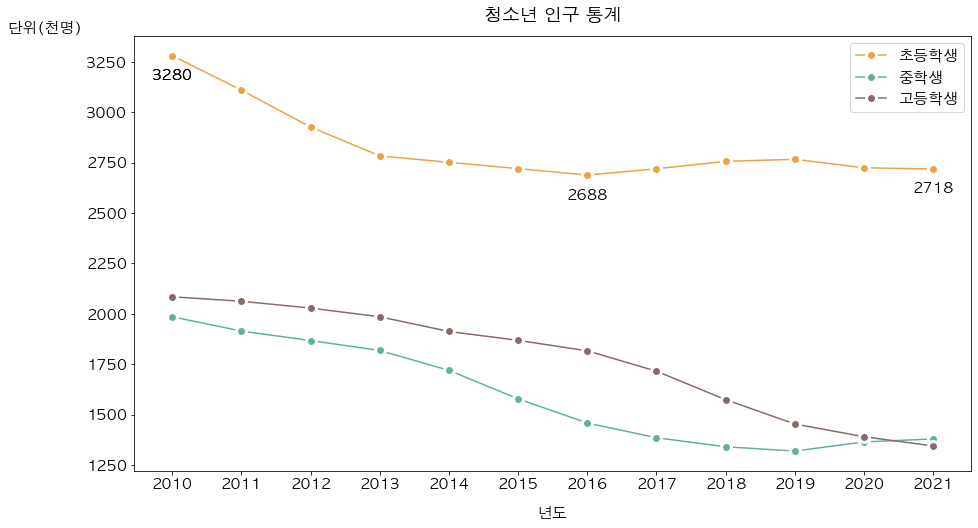

In [245]:
plt.figure(figsize=(15,8))
plt.plot(Test.index, Test['초등학교'], label='초등학생', marker='o', mec='w', mew=3, ms=10, c='#efa146')
plt.plot(Test.index, Test['중학교'],label='중학생', marker='o', mec='w', mew=3, ms=10, c='#60b2a0')
plt.plot(Test.index, Test['고등학교'], label='고등학생', marker='o', mec='w', mew=3, ms=10, c= '#886b68')
plt.ylabel('단위(천명)', rotation = 0, loc='top')
plt.xlabel('년도', labelpad=15)
plt.legend()
maxV = 0
maxId = 0
minV = 9999
minId = 9999
FristV = 0
FristId = 0
LastV = 0
LastId = 0
for idx, val in enumerate(Test['초등학교']):
    if(maxV < val):
        maxV = val
        maxId = idx
    if(minV > val):
        minV = val
        minId = idx
    if(FristId >= idx):
        FristV = val
        FristId = idx
    if(LastId <= idx):
        LastV = val
        LastId = idx
plt.text(maxId,maxV - 120, int(maxV), ha='center')
plt.text(minId,minV - 120, int(minV), ha='center')
plt.text(FristId,FristV - 120, int(FristV), ha='center')
plt.text(LastId,LastV - 120, int(LastV), ha='center')
plt.title('청소년 인구 통계',pad=15)
plt.savefig('studentpop.png', dpi=300)
        
plt.show()

In [8]:
3280-2718

562

2010년 부터 학생인구수가 점차 감소하고 있음.  
(초등학생 기준 2016년까지 감소추세였으나 이후에는 안정적인 그래프를 보여줌)
  
2010년 ~ 2013년에 초등학생 인구수가 급격한 감소가 있었고, 2014년 ~ 2017년 중학생 인구수가 감소한것으로 보아 2010년 ~ 2013년 초등학교 입학자수보다 졸업자수가 많았음을 알 수 있음  
(중학생의 2010년 ~ 2013년에는 급격한 감소가 없었던걸로 보아 초등학생의 2006~2009년의 그래프도 급격하지 않았을 것으로 추정)
  
2013년이후로는 초등학생 수는 안정적인 그래프를 보여줌.(입학생과 졸업생의 숫자가 비슷함을 의미)  
2021년의 인구수는 2010년 대비 약 83% 수준이고, 기간중 최저 인구수를 기록한 2016년 역시 약82% 수준으로 보아 안정적인 그래프 추세임을 알 수 있음

중학생 그래프도 아마 향후 4~5년은 안정적인 인구수 그래프를 보여 줄 것으로 예상. 

## 서울시 교육만족도

In [9]:
df_satifi = pd.read_excel('서울시 교육만족도/교육만족도.xls') #2년 주기로 조사됨
df_satifi

,기간,구분,매우 만족,약간 만족,보통,약간 불만족,매우 불만족
0,2008,교육내용(교육수준),9.4,46.1,33.4,9.2,1.9
1,2008,교육방법(수업지도 평가),6.5,38.5,36.3,16.4,2.2
2,2008,교우관계,22.8,47.8,26.6,2.1,0.6
3,2008,교사(교수)와의 관계,9.8,38.0,43.8,6.8,1.7
4,2008,학교시설 및 설비,7.7,33.4,36.1,16.7,6
5,2008,학교 주변 환경,6.8,27.4,38.7,18.5,8.6
6,2008,전반적인 학교생활,8.7,41.7,43.1,5.3,1.3
7,2010,교육내용(교육수준),11.4,42.4,39.2,5.9,1.1
8,2010,교육방법(수업지도 평가),7.7,38.2,40.9,11.4,1.7
9,2010,교우관계,22.4,46.3,28.0,2.4,0.9


In [10]:
filt = (df_satifi['구분'] == '교육내용(교육수준)') | (df_satifi['구분'] == '교육방법(수업지도 평가)')
edu_satifi = df_satifi[filt]
edu_satifi

,기간,구분,매우 만족,약간 만족,보통,약간 불만족,매우 불만족
0,2008,교육내용(교육수준),9.4,46.1,33.4,9.2,1.9
1,2008,교육방법(수업지도 평가),6.5,38.5,36.3,16.4,2.2
7,2010,교육내용(교육수준),11.4,42.4,39.2,5.9,1.1
8,2010,교육방법(수업지도 평가),7.7,38.2,40.9,11.4,1.7
15,2012,교육내용(교육수준),10.3,36.1,39.3,10.3,3.9
16,2012,교육방법(수업지도 평가),8.5,31.7,42.6,12.4,4.7
23,2014,교육내용(교육수준),13.1,37.1,39.6,8.7,1.5
24,2014,교육방법(수업지도 평가),10.6,34.6,39.5,13.4,1.9
31,2016,교육내용(교육수준),14.0,34.8,42.5,6.8,1.8
32,2016,교육방법(수업지도 평가),11.5,33.3,43.5,9.6,2.2


In [11]:
filt = edu_satifi['구분'] == '교육내용(교육수준)'
test = edu_satifi.loc[filt,['기간', '매우 만족', '약간 만족', '보통', '약간 불만족', '매우 불만족']]
test

,기간,매우 만족,약간 만족,보통,약간 불만족,매우 불만족
0,2008,9.4,46.1,33.4,9.2,1.9
7,2010,11.4,42.4,39.2,5.9,1.1
15,2012,10.3,36.1,39.3,10.3,3.9
23,2014,13.1,37.1,39.6,8.7,1.5
31,2016,14.0,34.8,42.5,6.8,1.8
39,2018,14.5,43.4,35.3,5.5,1.3
46,2020,26.1,37.1,27.3,8.3,1.2


Text(1.0, 1.0, '교육 방법 만족도')

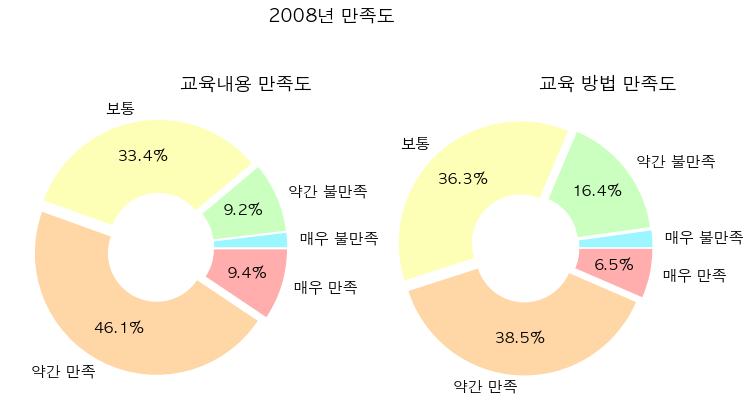

In [12]:
edu_satifi
filt3 = edu_satifi['기간'] == 2008
empty = edu_satifi.loc[filt3]
filt2 = empty.loc[:,['매우 만족', '약간 만족', '보통', '약간 불만족', '매우 불만족']]
filt2.reset_index()
dd = filt2.values.tolist()
labels = ['매우 만족', '약간 만족', '보통', '약간 불만족', '매우 불만족']

colors = ['#ffadad', '#ffd6a5', '#fdffb6', '#caffbf', '#9bf6ff']
explode = [0.05] * 5
wedgeprops = {'width':0.6}

def custom_autopct(pct):
    #return ('%.1f%%' %pct) if pct>=10 else ''
    return '{:.1f}%'.format(pct) if pct>=5 else ''

title_font = {
    'fontsize': 16,
    'fontweight': 'bold'
}

fig, axs = plt.subplots(1,2, figsize=(12,7))
fig.suptitle('2008년 만족도')
axs[0].pie(dd[0], labels=labels, autopct = custom_autopct, startangle=0, counterclock = False, colors = colors, explode =explode, wedgeprops = wedgeprops, pctdistance=0.7)
axs[0].set_title('교육내용 만족도', loc='right')

axs[1].pie(dd[1], labels=labels, autopct = custom_autopct, startangle=0, counterclock = False, colors = colors, explode =explode, wedgeprops = wedgeprops, pctdistance=0.7)
axs[1].set_title('교육 방법 만족도', loc='right')



Text(1.0, 1.0, '교육 방법 만족도')

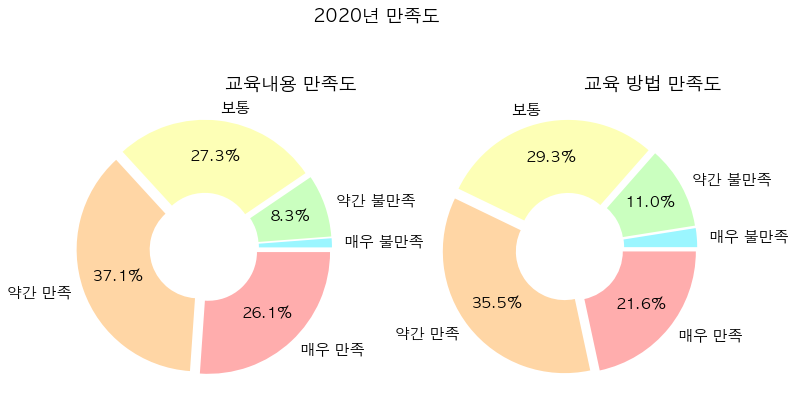

In [13]:
edu_satifi
filt3 = edu_satifi['기간'] == 2020
empty = edu_satifi.loc[filt3]
filt2 = empty.loc[:,['매우 만족', '약간 만족', '보통', '약간 불만족', '매우 불만족']]
filt2.reset_index()
dd = filt2.values.tolist()
labels = ['매우 만족', '약간 만족', '보통', '약간 불만족', '매우 불만족']

colors = ['#ffadad', '#ffd6a5', '#fdffb6', '#caffbf', '#9bf6ff']
explode = [0.05] * 5
wedgeprops = {'width':0.6}

def custom_autopct(pct):
    #return ('%.1f%%' %pct) if pct>=10 else ''
    return '{:.1f}%'.format(pct) if pct>=5 else ''

title_font = {
    'fontsize': 16,
    'fontweight': 'bold'
}

fig, axs = plt.subplots(1,2, figsize=(12,7))
fig.suptitle('2020년 만족도')
axs[0].pie(dd[0], labels=labels, autopct = custom_autopct, startangle=0, counterclock = False, colors = colors, explode =explode, wedgeprops = wedgeprops, pctdistance=0.7)
axs[0].set_title('교육내용 만족도', loc='right')

axs[1].pie(dd[1], labels=labels, autopct = custom_autopct, startangle=0, counterclock = False, colors = colors, explode =explode, wedgeprops = wedgeprops, pctdistance=0.7)
axs[1].set_title('교육 방법 만족도', loc='right')




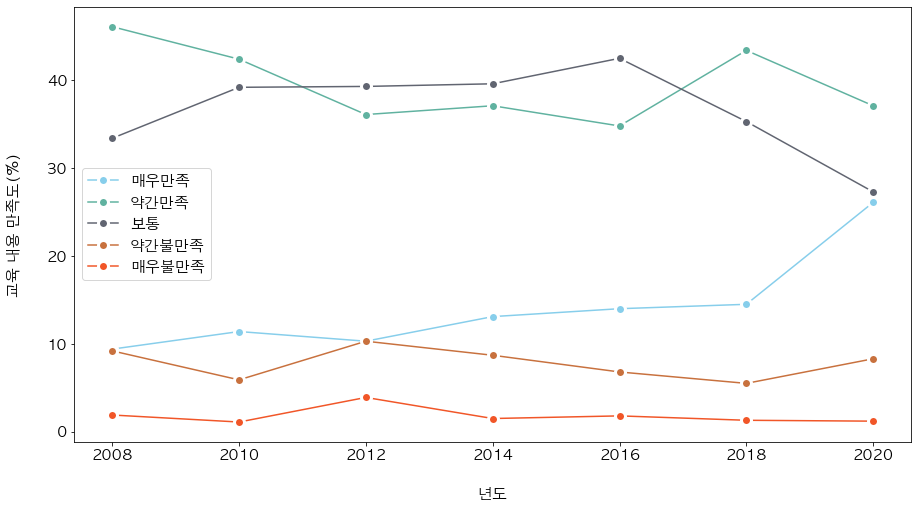

In [250]:
filt_1 = edu_satifi['구분'] == '교육내용(교육수준)'
filt_2 = edu_satifi['구분'] == '교육방법(수업지도 평가)'
#filt = (df_satifi['구분'] == '교육내용(교육수준)') | (df_satifi['구분'] == '교육방법(수업지도 평가)')

plt.figure(figsize=(15,8))
plt.plot(edu_satifi[filt_1]['기간'], edu_satifi[filt_1]['매우 만족'], label='매우만족', marker='o', mec='w', mew=3, ms=10, c = 'skyblue')
plt.plot(edu_satifi[filt_1]['기간'], edu_satifi[filt_1]['약간 만족'], label='약간만족', marker='o', mec='w', mew=3, ms=10, c= '#60b2a0')
plt.plot(edu_satifi[filt_1]['기간'], edu_satifi[filt_1]['보통'], label='보통', marker='o', mec='w', mew=3, ms=10 ,c = '#616571')
plt.plot(edu_satifi[filt_1]['기간'], edu_satifi[filt_1]['약간 불만족'], label='약간불만족', marker='o', mec='w', mew=3, ms=10, c='#c8713e')
plt.plot(edu_satifi[filt_1]['기간'], edu_satifi[filt_1]['매우 불만족'], label='매우불만족', marker='o', mec='w', mew=3, ms=10, c='#f15628')

plt.ylabel('교육 내용 만족도(%)', labelpad=25)
plt.xlabel('년도', labelpad=25)
plt.legend()
plt.savefig('save_satifi.png', dpi=300)

2015년 교육과정이 개정 되었는데 이전에는 만족하는 학생들의 수가 증가하는 추세를 보여주지는 못하였다.
2015년 교육과정 개정 이후 불만족은 전체적으로 감소하는 추세를 보여주었고 보통 이상의 수치는 유지 혹인 상승하는 그래프를 보여준다.
다만 급격한 변화는 2020년에 있었는데 보통과 약간 만족이 큰폭으로 감소하였다. 그에 비해 매우 만족이 큰 폭으로 증가하였지만 불만족하는 비율이 2015년 이후 처음으로 증가하였다. 이는 2020년에 발생한 코로나 사태로 인해서 온라인 수업을 진행하게 되었는데 그 영향으로 예상 된다.


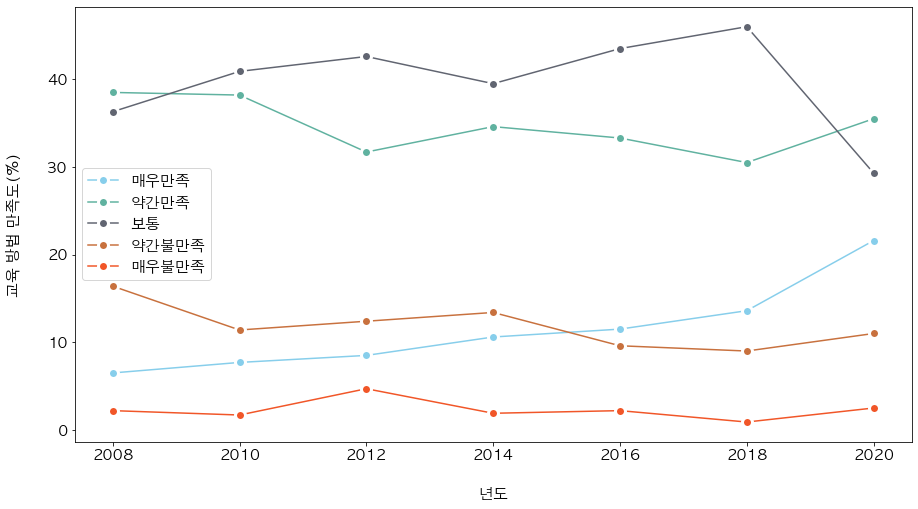

In [252]:
plt.figure(figsize=(15,8))
plt.plot(edu_satifi[filt_2]['기간'], edu_satifi[filt_2]['매우 만족'], label='매우만족', marker='o', mec='w', mew=3, ms=10, c = 'skyblue')
plt.plot(edu_satifi[filt_2]['기간'], edu_satifi[filt_2]['약간 만족'], label='약간만족', marker='o', mec='w', mew=3, ms=10, c= '#60b2a0')
plt.plot(edu_satifi[filt_2]['기간'], edu_satifi[filt_2]['보통'], label='보통', marker='o', mec='w', mew=3, ms=10, c = '#616571')
plt.plot(edu_satifi[filt_2]['기간'], edu_satifi[filt_2]['약간 불만족'], label='약간불만족', marker='o', mec='w', mew=3, ms=10, c='#c8713e')
plt.plot(edu_satifi[filt_2]['기간'], edu_satifi[filt_2]['매우 불만족'], label='매우불만족', marker='o', mec='w', mew=3, ms=10, c='#f15628')

plt.ylabel('교육 방법 만족도(%)', labelpad= 25)
plt.xlabel('년도', labelpad=25)
plt.legend()
plt.savefig('save_satifi2.png', dpi=300)

교육 내용에 대한 만족도와 전체적으로 비슷한 그래프를 보여준다.
다만 2020년도에 보통에 대한 설문이 나머지 4가지 항목으로 고루 분배 된 것을 볼 수 있다.
변화가 큰 2020년의 항목을 제외한다면 교육 방법에 대한 만족도는 시간이 갈 수록 만족하는 비율이 증가한다고 할 수 있다.

## 공/사 교육 만족도 조사

지도 시각화는 타뷸라를 통해서 구현 예정


In [16]:
df_edu_satifi = pd.read_excel('공사 교육환경 만족도/2018년.xls')
df_edu_satifi

,기간,대분류,분류,사교육 환경,사교육 환경.1,사교육 환경.2,사교육 환경.3
0,기간,대분류,분류,사교육 전체,비용,교육수준 및 질,접근성
1,2018,서울시,서울시,5.24,4.25,5.59,5.89
2,2018,성별,남자,5.26,4.26,5.61,5.91
3,2018,성별,여자,4.99,4.14,5.29,5.53
4,2018,연령별,20대 이하,6.34,4.75,7.14,7.14
5,2018,연령별,30대,5.38,4.56,5.66,5.93
6,2018,연령별,40대,5.25,4.2,5.66,5.9
7,2018,연령별,50대,5.18,4.27,5.42,5.83
8,2018,연령별,60대 이상,5.02,4.04,5.23,5.8
9,2018,학력별,중졸 이하,4.7,3.6,5.11,5.38


In [17]:
df_edu_satifi.head()

,기간,대분류,분류,사교육 환경,사교육 환경.1,사교육 환경.2,사교육 환경.3
0,기간,대분류,분류,사교육 전체,비용,교육수준 및 질,접근성
1,2018,서울시,서울시,5.24,4.25,5.59,5.89
2,2018,성별,남자,5.26,4.26,5.61,5.91
3,2018,성별,여자,4.99,4.14,5.29,5.53
4,2018,연령별,20대 이하,6.34,4.75,7.14,7.14


In [18]:
df_edu_satifi.rename(columns={'사교육 환경':'사교육 전체', '사교육 환경.1':'비용','사교육 환경.2':'교육수준','사교육 환경.3':'접근성'}, inplace=True)
df_edu_satifi.drop(0)
SeoulEduSatifi = df_edu_satifi

In [19]:
SeoulEduSatifi.iloc[36:60]

,기간,대분류,분류,사교육 전체,비용,교육수준,접근성
36,2018,중구,중구,…,4.21,4.4,4.63
37,2018,용산구,용산구,…,4.18,5.92,6.33
38,2018,성동구,성동구,…,3.92,5.67,5.94
39,2018,광진구,광진구,…,4.28,5.83,5.89
40,2018,동대문구,동대문구,…,4.08,5.07,4.96
41,2018,중랑구,중랑구,…,4.19,5.53,5.7
42,2018,성북구,성북구,…,4.23,5.31,5.14
43,2018,강북구,강북구,…,4.41,4.62,4.85
44,2018,도봉구,도봉구,…,4.27,5.23,5.36
45,2018,노원구,노원구,…,4.15,5.52,5.87


In [20]:
import numpy as np

In [21]:
for i in range(13,21):
    df_edu_satifi = pd.read_excel('공사 교육환경 만족도/20' + str(i) + '년.xls')
    df_edu_satifi.rename(columns={'사교육 환경':'사교육 전체', '사교육 환경.1':'비용','사교육 환경.2':'교육수준','사교육 환경.3':'접근성'}, inplace=True)
    if i == 13 :
        seoul_edu_df = df_edu_satifi.iloc[[1],:]
#         seoul_edu_df = df_edu_satifi.iloc[1]
    else :
        seoul_edu_df = seoul_edu_df.append(df_edu_satifi.iloc[[1],:], ignore_index=True)

seoul_edu_df

,기간,대분류,분류,공교육 환경,사교육 전체,비용,교육수준,접근성
0,2013,서울시,서울시,5.74,4.83,3.87,5.09,5.52
1,2014,서울시,서울시,5.53,4.75,3.74,5.07,5.44
2,2015,서울시,서울시,5.56,5.03,4.07,5.49,5.51
3,2016,서울시,서울시,5.43,5.22,4.21,5.6,5.85
4,2017,서울시,서울시,5.5,5.24,4.29,5.58,5.86
5,2018,서울시,서울시,NaN,5.24,4.25,5.59,5.89
6,2019,서울시,서울시,5.43,5.4,4.49,5.7,5.95
7,2020,서울시,서울시,5.3,5.38,…,…,…


In [22]:
seoul_edu_df.drop(['대분류','분류'], axis=1, inplace=True)

In [23]:
seoul_edu_df.set_index(['기간'])

,공교육 환경,사교육 전체,비용,교육수준,접근성
기간,,,,,
2013,5.74,4.83,3.87,5.09,5.52
2014,5.53,4.75,3.74,5.07,5.44
2015,5.56,5.03,4.07,5.49,5.51
2016,5.43,5.22,4.21,5.6,5.85
2017,5.5,5.24,4.29,5.58,5.86
2018,NaN,5.24,4.25,5.59,5.89
2019,5.43,5.4,4.49,5.7,5.95
2020,5.3,5.38,…,…,…


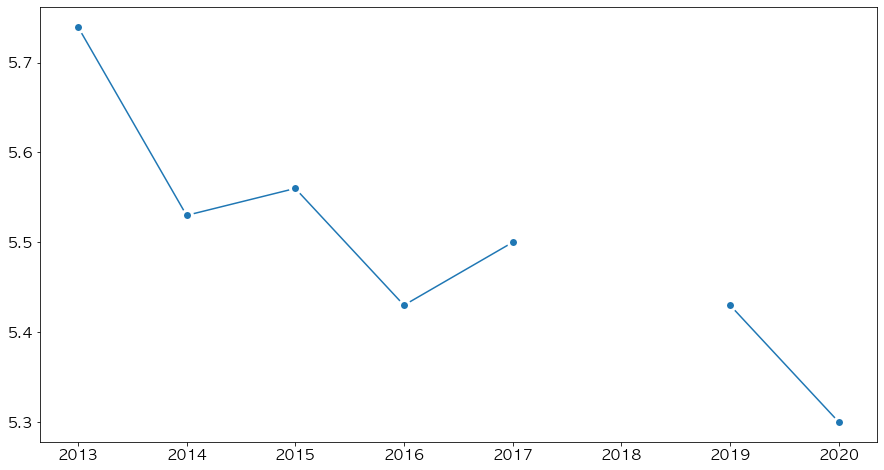

In [24]:
plt.figure(figsize=(15,8))
plt.plot(seoul_edu_df['기간'], seoul_edu_df['공교육 환경'], label='공교육', marker='o', mec='w', mew=3, ms=10)

공교육 만족도 2018년 결측치는 17년,19년의 중간값이 아닌 사교육 만족도와 공교육 만족도간의 관계를 보고 결정


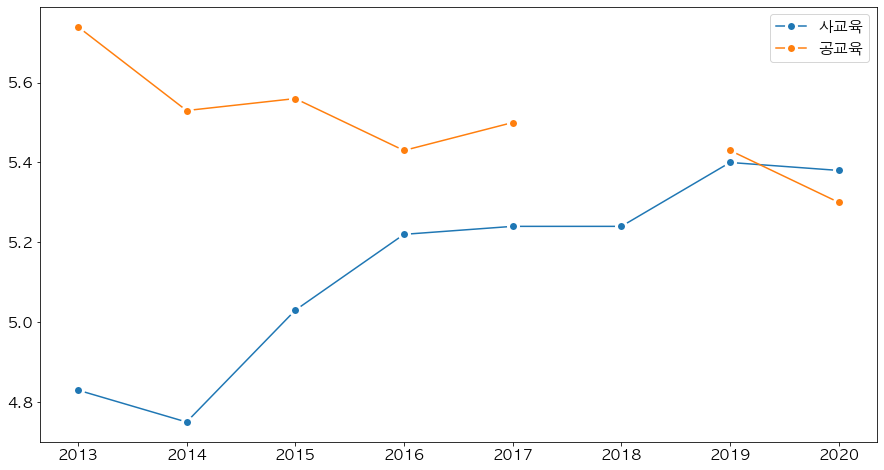

In [25]:
plt.figure(figsize=(15,8))
plt.plot(seoul_edu_df['기간'], seoul_edu_df['사교육 전체'], label='사교육', marker='o', mec='w', mew=3, ms=10)
plt.plot(seoul_edu_df['기간'], seoul_edu_df['공교육 환경'], label='공교육', marker='o', mec='w', mew=3, ms=10)
plt.legend()

 공교육은 꾸준한 우하향 그래프를 보여주고 있다. 반면 사교육은 교육과정 개정전인 2013년 ~ 2014년에는 감소하였지만 교육과정 개정 이후 꾸준한 우상향 그래프를 보여주고 있다.
 
공교육의 2018년 결측치는 2016~2018년 사교육의 매우 적은 변화율을 고려하여 2016년과 2017년 점수의 평균으로 할 수 있겠지만 사교육 만족도가 2019년에 급격하게 상승한 것으로 보아 2018년 공굑육의 점수를 비슷한 점수로 하기에는 명확한 근거는 없다.

그이외에는 2018년의 점수를 추측할 수 있는 방법이 없다고 생각 됨.

## 공교육의 꾸준한 하락세, 사교육의 상승세가 멈춘 시점을 고려해 공교육도 하락세가 심하지 않았을 것
으로 생각되어 16년, 17년의 점수의 평균으로 계산



In [26]:
# filt = seoul_edu_df['기간']=='2018'
# seoul_edu_df.loc[filt]['공교육 환경'] = seoul_edu_df[]

naFilt = seoul_edu_df[seoul_edu_df['공교육 환경'].isnull()].index

seoul_edu_df['공교육 환경'].fillna(float(seoul_edu_df.iloc[naFilt-1]['공교육 환경'].values + seoul_edu_df.iloc[naFilt-2]['공교육 환경'].values)/2, inplace=True)

seoul_edu_df


,기간,공교육 환경,사교육 전체,비용,교육수준,접근성
0,2013,5.740,4.83,3.87,5.09,5.52
1,2014,5.530,4.75,3.74,5.07,5.44
2,2015,5.560,5.03,4.07,5.49,5.51
3,2016,5.430,5.22,4.21,5.6,5.85
4,2017,5.500,5.24,4.29,5.58,5.86
5,2018,5.465,5.24,4.25,5.59,5.89
6,2019,5.430,5.4,4.49,5.7,5.95
7,2020,5.300,5.38,…,…,…


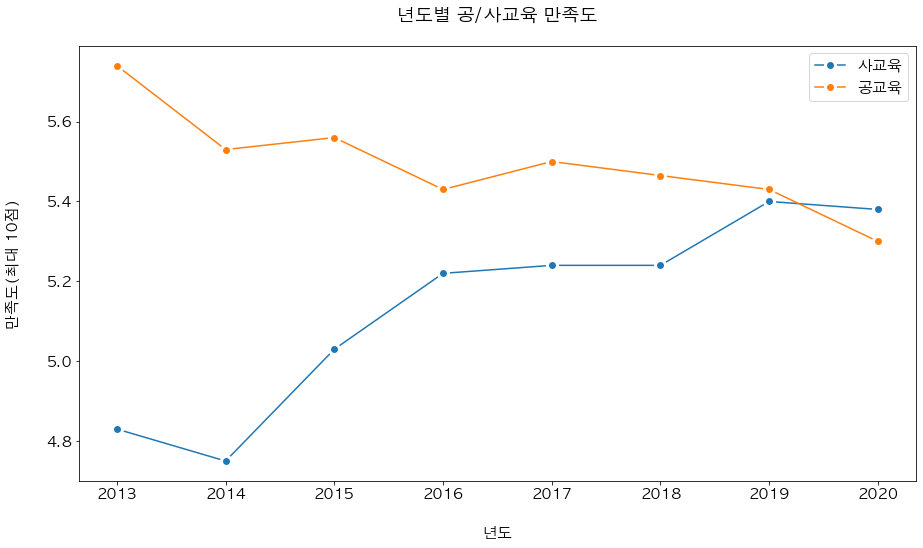

In [93]:
plt.figure(figsize=(15,8))
plt.plot(seoul_edu_df['기간'], seoul_edu_df['사교육 전체'], label='사교육', marker='o', mec='w', mew=3, ms=10)
plt.plot(seoul_edu_df['기간'], seoul_edu_df['공교육 환경'], label='공교육', marker='o', mec='w', mew=3, ms=10)
plt.legend()
plt.title('년도별 공/사교육 만족도', pad= 25)
plt.xlabel('년도', labelpad= 25)
plt.ylabel('만족도(최대 10점)', labelpad=25)
plt.savefig('save_GongSa_satifi.png', dpi=150)

공교육의 만족도는 우하향 있고 사교육은 우상향 그래프를 보여주고 있다.  
2015년에 교육과정이 개정됐기 때문에 15년 이전의 그래프를 빼놓고 보면

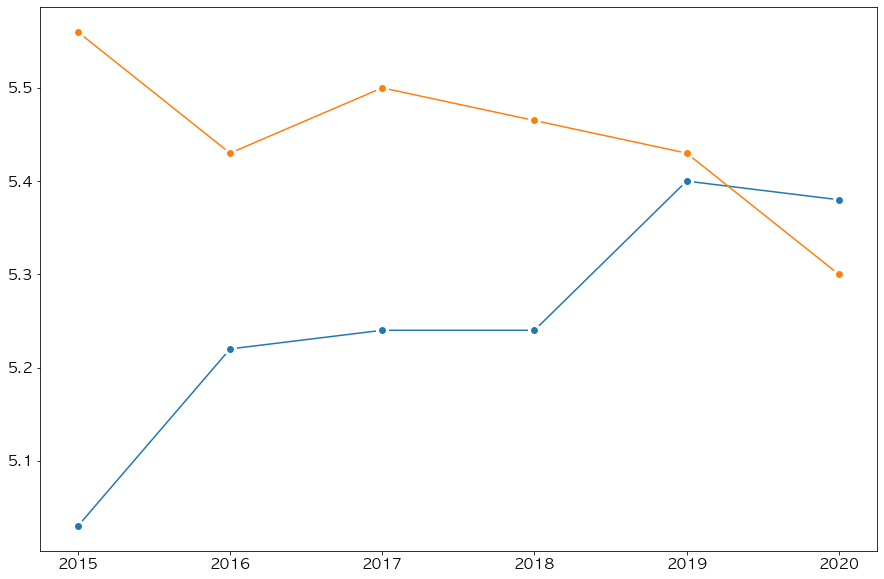

In [28]:
filtYear = (seoul_edu_df['기간'] != '2013') & (seoul_edu_df['기간'] != '2014')


plt.figure(figsize=(15,10))
plt.plot(seoul_edu_df[filtYear]['기간'], seoul_edu_df[filtYear]['사교육 전체'], label='사교육', marker='o', mec='w', mew=3, ms=10)
plt.plot(seoul_edu_df[filtYear]['기간'], seoul_edu_df[filtYear]['공교육 환경'], label='공교육', marker='o', mec='w', mew=3, ms=10)


13년도 이전의 만족도는 09, 10, 12년의 자료만 존재 11년 자료는 없기에 결측값 처리 필요

In [29]:
import os

path = '공사 교육환경 만족도/'
file_list = os.listdir(path)
    
file_list_py = [file for file in file_list if file.endswith('.xls')]
file_list_py

for i in file_list_py:
#     if i == fiel_list_py[0:3]:
#         edu_df = pd.read_excel('공사 교육환경 만족도/' + i, header=[0,1])
#     else:
    edu_df = pd.read_excel('공사 교육환경 만족도/' + i)
    
    if i == file_list_py[0]:
        before_edu_df = edu_df.iloc[[1],:]
    else:
        before_edu_df = before_edu_df.append(edu_df.iloc[[1],:], ignore_index=True)

before_edu_df.sort_values('기간')

,기간,대분류,분류,공교육 환경,사교육 환경,사교육 환경.1,사교육 환경.2,사교육 환경.3,공교육에 대한 만족도,공교육에 대한 만족도.1,공교육에 대한 만족도.2,공교육에 대한 만족도.3,공교육에 대한 만족도.4,공교육에 대한 만족도.5,사교육에 대한 만족도,사교육에 대한 만족도.1,사교육에 대한 만족도.2,사교육에 대한 만족도.3,사교육에 대한 만족도.4,사교육에 대한 만족도.5
3,2009,서울시,서울시,NaN,NaN,NaN,NaN,NaN,3.3,18.8,47.4,27.4,3,5.2,7.9,27.4,44.6,18.6,1.5,4.46
10,2010,서울시,서울시,NaN,NaN,NaN,NaN,NaN,5.1,16.8,43.7,32.6,1.8,5.23,8.2,26.4,41.6,22.4,1.3,4.56
9,2012,서울시,서울시,NaN,NaN,NaN,NaN,NaN,1.6,17.6,46.4,31.4,3.1,5.42,5,29,43.8,20.9,1.3,4.62
4,2013,서울시,서울시,5.74,4.83,3.87,5.09,5.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2014,서울시,서울시,5.53,4.75,3.74,5.07,5.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,서울시,서울시,5.56,5.03,4.07,5.49,5.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2016,서울시,서울시,5.43,5.22,4.21,5.6,5.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,서울시,서울시,5.5,5.24,4.29,5.58,5.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018,서울시,서울시,NaN,5.24,4.25,5.59,5.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2019,서울시,서울시,5.43,5.4,4.49,5.7,5.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


09,10,12년 서울시 만족도 데이트 프레임 생성

In [30]:
import os

path = '공사 교육환경 만족도/'
file_list = os.listdir(path)
    
file_list_py = [file for file in file_list if file.endswith('.xls')]
file_list_py.sort()

for i in file_list_py:
    if (i == file_list_py[0]) | (i == file_list_py[1]) | (i == file_list_py[2]):
        before_edu = pd.read_excel('공사 교육환경 만족도/' + i, header=[0,1])

        if (i == file_list_py[0]):
            before_edu_df = before_edu.iloc[[1],:]
        else:
            before_edu_df = before_edu_df.append(before_edu.iloc[[1],:], ignore_index=True)
    else:
        continue
        
before_edu_df

기간 대분류  분류 공교육에 대한 만족도                                 사교육에 대한 만족도  \
     기간 대분류  분류      매우 불만족 약간 불만족    보통 약간 만족 매우 만족 10점 평균      매우 불만족   
0  2009  성별  남자         3.2   18.9  46.9  28.0     3   5.22         7.5   
1  2010  성별  남자         5.1   16.6  43.5  32.9   1.8   5.24         8.1   
2  2012  성별  남자         1.6   17.3  46.3  31.6   3.2   5.44         5.2   

                                   
  약간 불만족    보통 약간 만족 매우 만족 10점 평균  
0   27.3  44.3  19.3   1.6   4.50  
1   26.0  41.7  23.0   1.3   4.59  
2   28.3  43.5  21.6   1.4   4.64

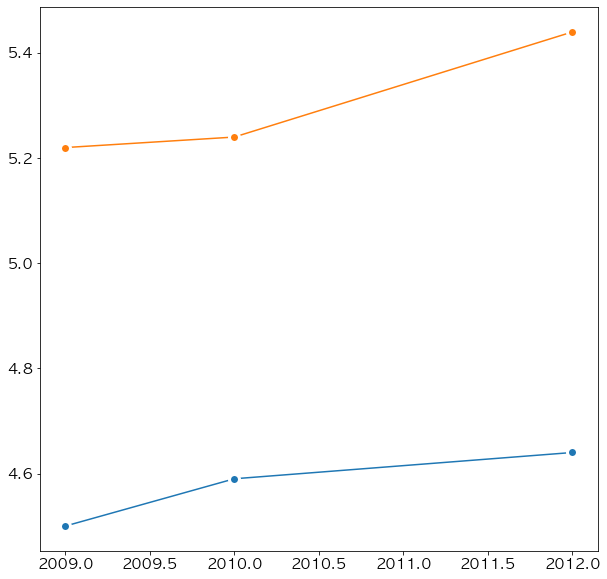

In [31]:
plt.figure(figsize=(10,10))
plt.plot(before_edu_df['기간'], before_edu_df['사교육에 대한 만족도']['10점 평균'], label='사교육', marker='o', mec='w', mew=3, ms=10)
plt.plot(before_edu_df['기간'], before_edu_df['공교육에 대한 만족도']['10점 평균'], label='공교육', marker='o', mec='w', mew=3, ms=10)


2011년 데이터를 비어 두기 위해 빈 시리즈 삽입(2011년)

In [32]:
before_edu_df = before_edu_df.append(before_edu_df.iloc[0].copy(),ignore_index=True)

In [33]:
before_edu_df.loc[3:,'기간'] = 2011
before_edu_df.sort_values([('기간','기간')])

기간 대분류  분류 공교육에 대한 만족도                                 사교육에 대한 만족도  \
     기간 대분류  분류      매우 불만족 약간 불만족    보통 약간 만족 매우 만족 10점 평균      매우 불만족   
0  2009  성별  남자         3.2   18.9  46.9  28.0     3   5.22         7.5   
1  2010  성별  남자         5.1   16.6  43.5  32.9   1.8   5.24         8.1   
3  2011  성별  남자         3.2   18.9  46.9  28.0     3   5.22         7.5   
2  2012  성별  남자         1.6   17.3  46.3  31.6   3.2   5.44         5.2   

                                   
  약간 불만족    보통 약간 만족 매우 만족 10점 평균  
0   27.3  44.3  19.3   1.6   4.50  
1   26.0  41.7  23.0   1.3   4.59  
3   27.3  44.3  19.3   1.6   4.50  
2   28.3  43.5  21.6   1.4   4.64

In [34]:
before_edu_df.set_index([('기간','기간')])

대분류  분류 공교육에 대한 만족도                                 사교육에 대한 만족도  \
         대분류  분류      매우 불만족 약간 불만족    보통 약간 만족 매우 만족 10점 평균      매우 불만족   
(기간, 기간)                                                                   
2009      성별  남자         3.2   18.9  46.9  28.0     3   5.22         7.5   
2010      성별  남자         5.1   16.6  43.5  32.9   1.8   5.24         8.1   
2012      성별  남자         1.6   17.3  46.3  31.6   3.2   5.44         5.2   
2011      성별  남자         3.2   18.9  46.9  28.0     3   5.22         7.5   

                                          
         약간 불만족    보통 약간 만족 매우 만족 10점 평균  
(기간, 기간)                                  
2009       27.3  44.3  19.3   1.6   4.50  
2010       26.0  41.7  23.0   1.3   4.59  
2012       28.3  43.5  21.6   1.4   4.64  
2011       27.3  44.3  19.3   1.6   4.50

In [35]:
before_edu_df['공교육에 대한 만족도','10점 평균'][3] = ((5.24+5.44)/2)
before_edu_df['사교육에 대한 만족도','10점 평균'][3] = ((4.59+4.64)/2)

/var/folders/jt/jw2pb8hx71d48w0rx0cgqf_80000gn/T/ipykernel_1373/4173584162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_edu_df['공교육에 대한 만족도','10점 평균'][3] = ((5.24+5.44)/2)
/var/folders/jt/jw2pb8hx71d48w0rx0cgqf_80000gn/T/ipykernel_1373/4173584162.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_edu_df['사교육에 대한 만족도','10점 평균'][3] = ((4.59+4.64)/2)


In [36]:
before_edu_df.sort_values(('기간','기간'))

기간 대분류  분류 공교육에 대한 만족도                                 사교육에 대한 만족도  \
     기간 대분류  분류      매우 불만족 약간 불만족    보통 약간 만족 매우 만족 10점 평균      매우 불만족   
0  2009  성별  남자         3.2   18.9  46.9  28.0     3   5.22         7.5   
1  2010  성별  남자         5.1   16.6  43.5  32.9   1.8   5.24         8.1   
3  2011  성별  남자         3.2   18.9  46.9  28.0     3   5.34         7.5   
2  2012  성별  남자         1.6   17.3  46.3  31.6   3.2   5.44         5.2   

                                   
  약간 불만족    보통 약간 만족 매우 만족 10점 평균  
0   27.3  44.3  19.3   1.6  4.500  
1   26.0  41.7  23.0   1.3  4.590  
3   27.3  44.3  19.3   1.6  4.615  
2   28.3  43.5  21.6   1.4  4.640

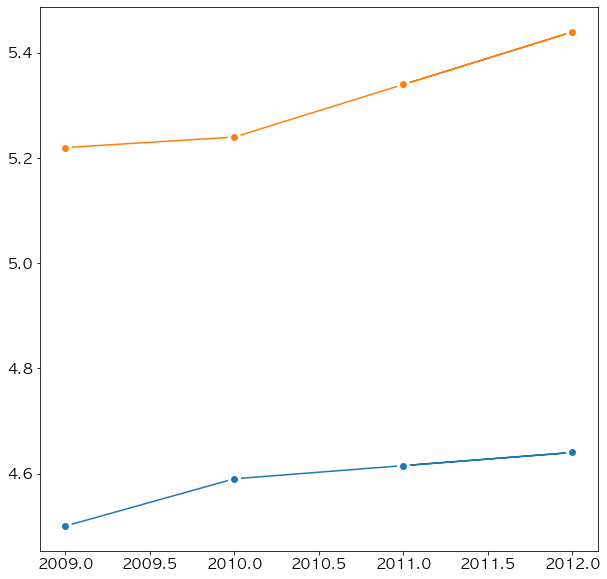

In [37]:
plt.figure(figsize=(10,10))
plt.plot(before_edu_df[('기간','기간')], before_edu_df['사교육에 대한 만족도']['10점 평균'], label='사교육', marker='o', mec='w', mew=3, ms=10)
plt.plot(before_edu_df[('기간','기간')], before_edu_df['공교육에 대한 만족도']['10점 평균'], label='공교육', marker='o', mec='w', mew=3, ms=10)



In [38]:
TT = before_edu_df['공교육에 대한 만족도']['10점 평균']
TT.name = '공교육 만족도'
TT2 = before_edu_df['사교육에 대한 만족도']['10점 평균']
TT2.name = '사교육 만족도'

In [39]:
sum_before = [before_edu_df[('기간','기간')], TT, TT2]
sum_before[0].rename('기간', inplace=True)
sum_before = pd.DataFrame(sum_before).T
sum_before.set_index('기간')

,공교육 만족도,사교육 만족도
기간,,
2009.0,5.22,4.500
2010.0,5.24,4.590
2012.0,5.44,4.640
2011.0,5.34,4.615


In [40]:
sum_now = [seoul_edu_df['기간'], seoul_edu_df['공교육 환경'], seoul_edu_df['사교육 전체']]
sum_now = pd.DataFrame(sum_now).T
sum_now.set_index('기간')
sum_now.dropna()
sum_now.rename(columns = {'공교육 환경':'공교육 만족도', '사교육 전체':'사교육 만족도'}, inplace=True)

In [41]:
sum_edu_df = pd.concat([sum_before, sum_now])
sum_edu_df.dropna(inplace=True)
sum_edu_df = sum_edu_df.astype({'기간':'int'})
sum_edu_df.sort_values('기간',inplace=True)
sum_edu_df.reset_index()

,index,기간,공교육 만족도,사교육 만족도
0,0,2009,5.22,4.5
1,1,2010,5.24,4.59
2,3,2011,5.34,4.615
3,2,2012,5.44,4.64
4,0,2013,5.74,4.83
5,1,2014,5.53,4.75
6,2,2015,5.56,5.03
7,3,2016,5.43,5.22
8,4,2017,5.5,5.24
9,5,2018,5.465,5.24


## 2009 ~ 2020년까지 공/사 교육 만족도 그래프

In [201]:
sum_edu_df

,기간,공교육 만족도,사교육 만족도
0,2009,5.22,4.5
1,2010,5.24,4.59
3,2011,5.34,4.615
2,2012,5.44,4.64
0,2013,5.74,4.83
1,2014,5.53,4.75
2,2015,5.56,5.03
3,2016,5.43,5.22
4,2017,5.5,5.24
5,2018,5.465,5.24


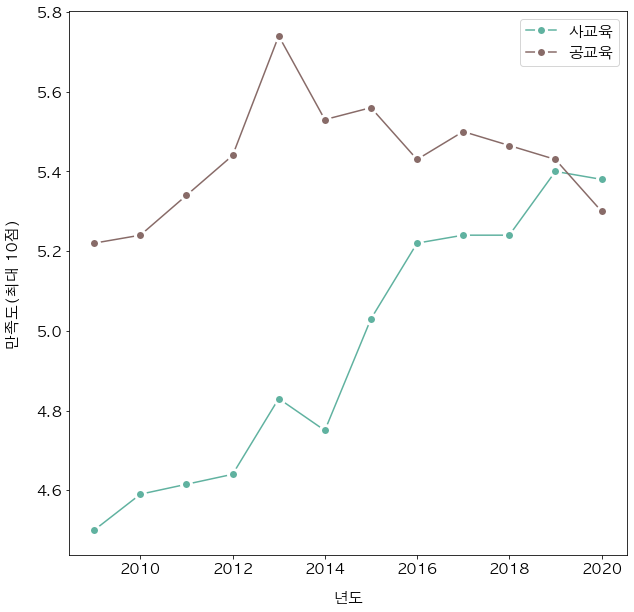

In [255]:
plt.figure(figsize=(10,10))
plt.plot(sum_edu_df['기간'], sum_edu_df['사교육 만족도'], label='사교육', marker='o', mec='w', mew=3, ms=10, c ='#60b2a0')
plt.plot(sum_edu_df['기간'], sum_edu_df['공교육 만족도'], label='공교육', marker='o', mec='w', mew=3, ms=10, c = '#886b68')
plt.legend()
plt.xlabel('년도', labelpad= 15)
plt.ylabel('만족도(최대 10점)', labelpad=15)
plt.savefig('save_GongSa_satifi.png', dpi=300)

## 교육과정 개정 시점 시준 그래프 분리

<Figure size 432x288 with 0 Axes>

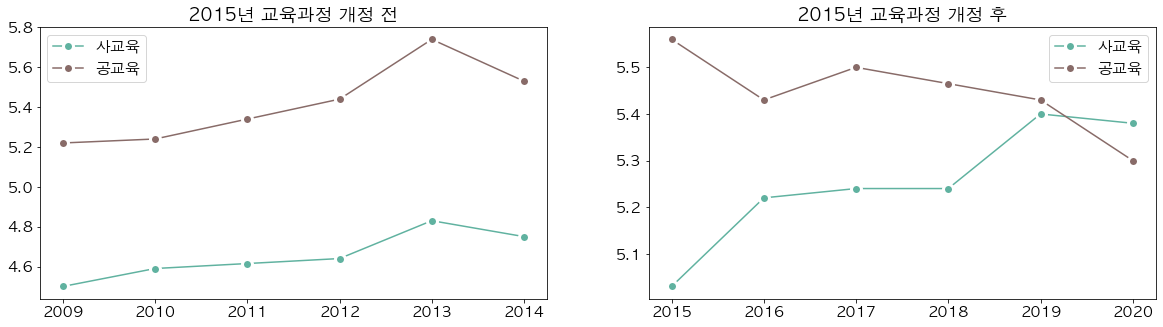

In [257]:
filt2015 = sum_edu_df['기간']>=2015

fig = plt.figure()

fix, ax = plt.subplots(1,2, figsize=(20,5))

ax[0].plot(sum_edu_df[~filt2015]['기간'], sum_edu_df[~filt2015]['사교육 만족도'], label='사교육',marker='o', mec='w', mew=3, ms=10, c ='#60b2a0' )
ax[0].plot(sum_edu_df[~filt2015]['기간'], sum_edu_df[~filt2015]['공교육 만족도'], label='공교육',marker='o', mec='w', mew=3, ms=10, c = '#886b68' )
ax[0].legend()
ax[0].set_title('2015년 교육과정 개정 전')

ax[1].plot(sum_edu_df[filt2015]['기간'], sum_edu_df[filt2015]['사교육 만족도'], label='사교육',marker='o', mec='w', mew=3, ms=10, c ='#60b2a0'  )
ax[1].plot(sum_edu_df[filt2015]['기간'], sum_edu_df[filt2015]['공교육 만족도'], label='공교육',marker='o', mec='w', mew=3, ms=10, c = '#886b68')
ax[1].legend()
ax[1].set_title('2015년 교육과정 개정 후')

plt.savefig('distribute_satifi.png', dpi = 300)


분리된 그래프를 통해 확인 할 수 있는 것은 교육과정 개정 이전에는 공교육과 사교육의 만족도가 같은 흐름을 보여준다. 만족도는 비교적 공교육이 더 높았다.  
  
  
교육과정 개정 이후부터 공교육은 우하향, 사교육은 우상향으로 서로 상반된 그래프 흐름을 보여준다. 이는 이전보다 사교육이 공교육보다 더 높은 만족도를 주고 있음을 알 수 있다.  
  
다음은 서울시의 모든 지역의 교육 수준이 똑같지 않기 때문에 이를 세분화하여 동북,서북,서남,동남,도심 5가지로 구분하여 분석해보도록 하겠다.

In [44]:
path = '공사 교육환경 만족도/'
file_list = os.listdir(path)
    
file_list_py = [file for file in file_list if file.endswith('.xls')]
file_list_py.sort()



for i in file_list_py:
    if (i == file_list_py[0]) | (i == file_list_py[1]) | (i == file_list_py[2]):
        before_edu_seg = pd.read_excel('공사 교육환경 만족도/' + i, header=[0,1])
        filtseg = (before_edu_seg[('대분류', '대분류')] == '지역대분류')            
        if (i == file_list_py[0]):
            before_edu_seg_df = before_edu_seg[filtseg]
        else:
            before_edu_seg_df = before_edu_seg_df.append(before_edu_seg[filtseg], ignore_index=True)

    else:
        now_edu_seg = pd.read_excel('공사 교육환경 만족도/'+i, header=[0,1])
        filtseg = (now_edu_seg[('대분류', '대분류')] == '지역대분류')
        if(i == file_list_py[3]):
            now_edu_seg_df = now_edu_seg[filtseg]
        else:
            now_edu_seg_df = now_edu_seg_df.append(now_edu_seg[filtseg], ignore_index=True)


In [228]:
import numpy
tempfilt = now_edu_seg_df['지역']
filtD = tempfilt.drop_duplicates()
filtyear = (now_edu_seg_df['기간'] == 2018)
df2018 = now_edu_seg_df[filtyear]

for i in filtD:
    filtdis = (now_edu_seg_df['지역'] == i)
    
    for j in df2018[filtdis].index.values:
        now_edu_seg_df.iloc[j,2] = round((now_edu_seg_df[filtdis].iloc[4,2] + now_edu_seg_df[filtdis].iloc[6,2])/2 , 2)
    

    
        
        
now_edu_seg_df

/var/folders/jt/jw2pb8hx71d48w0rx0cgqf_80000gn/T/ipykernel_1373/3795619927.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for j in df2018[filtdis].index.values:


,기간,지역,공교육 만족도,사교육 만족도
0,2013,도심권,5.44,4.3
1,2013,동북권,5.71,4.85
2,2013,서북권,5.97,4.7
3,2013,서남권,5.66,4.52
4,2013,동남권,5.83,5.39
5,2014,도심권,5.66,4.82
6,2014,동북권,5.51,4.67
7,2014,서북권,5.46,4.55
8,2014,서남권,5.22,4.59
9,2014,동남권,6.01,5.24


In [229]:
Tfilt = before_edu_seg_df[('기간','기간')]
Tfilt.name = '기간'
Gfilt = before_edu_seg_df[('공교육에 대한 만족도','10점 평균')]
Gfilt.name = '공교육 만족도'
Sfilt = before_edu_seg_df['사교육에 대한 만족도','10점 평균']
Sfilt.name = '사교육 만족도'
Lfilt = before_edu_seg_df['분류','분류']
Lfilt.name = '지역'
before_edu_seg_df = pd.DataFrame([Tfilt, Lfilt, Gfilt, Sfilt])
before_edu_seg_df = before_edu_seg_df.T

KeyError: ('기간', '기간')

In [47]:
Tfilt = now_edu_seg_df[('기간','기간')]
Tfilt.name = '기간'
Gfilt = now_edu_seg_df[('공교육 환경','공교육 환경')]
Gfilt.name = '공교육 만족도'
Sfilt = now_edu_seg_df['사교육 환경','사교육 전체']
Sfilt.name = '사교육 만족도'
Lfilt = now_edu_seg_df['분류','분류']
Lfilt.name = '지역'
now_edu_seg_df = pd.DataFrame([Tfilt, Lfilt, Gfilt, Sfilt])
now_edu_seg_df = now_edu_seg_df.T

In [232]:
sum_edu_seg_df = pd.concat([before_edu_seg_df, now_edu_seg_df])
sum_edu_seg_df

,기간,지역,공교육 만족도,사교육 만족도
0,2009,도심권,4.85,4.01
1,2009,동북권,5.23,4.39
2,2009,서북권,5.35,4.19
3,2009,서남권,5.01,4.33
4,2009,동남권,5.36,4.94
5,2010,도심권,5.12,4.53
6,2010,동북권,5.28,4.48
7,2010,서북권,5.06,4.39
8,2010,서남권,5.06,4.44
9,2010,동남권,5.49,4.92


## 공교육 만족도

Text(0.5, 1.0, '서남권')

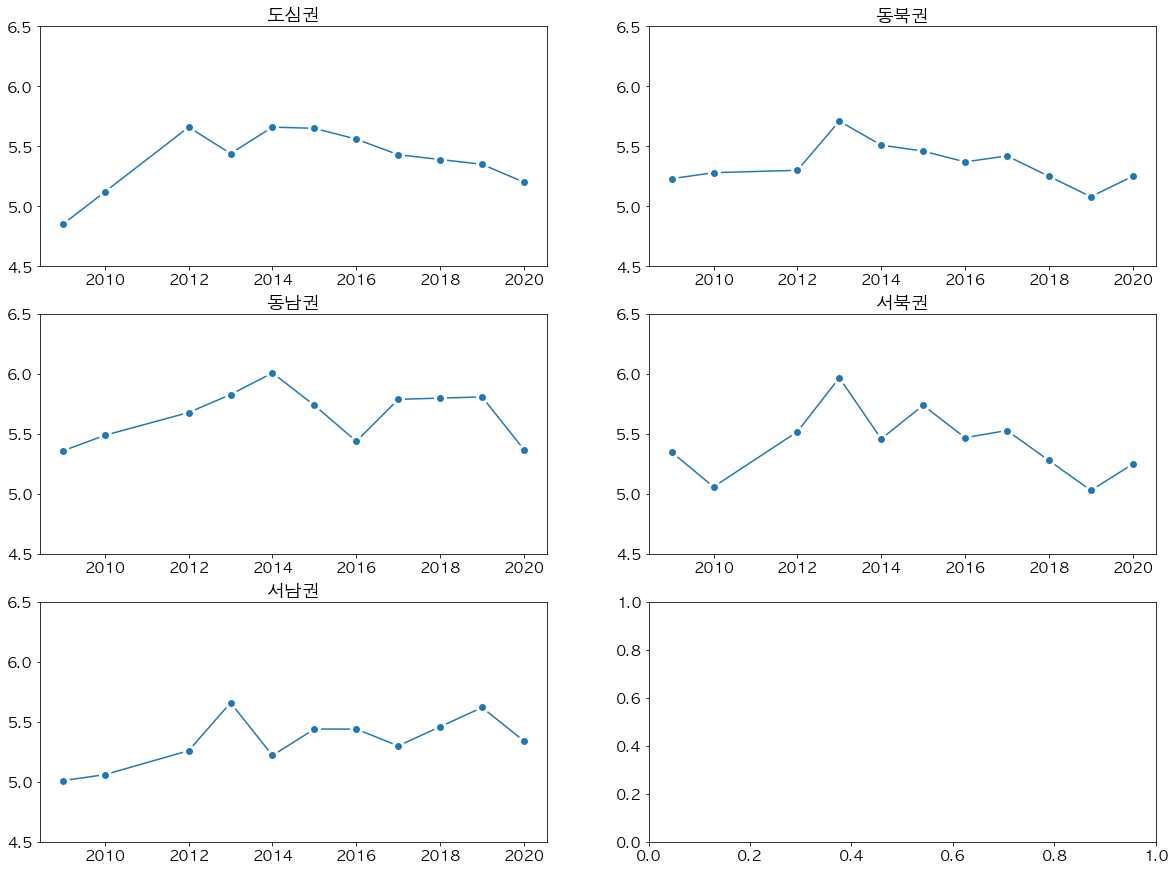

In [233]:
filtD = (sum_edu_seg_df['지역'] == '도심권')
filtEN = (sum_edu_seg_df['지역'] == '동북권')
filtES = (sum_edu_seg_df['지역'] == '동남권')
filtWN = (sum_edu_seg_df['지역'] == '서북권')
filtWS = (sum_edu_seg_df['지역'] == '서남권')


fix, ax2 = plt.subplots(3,2, figsize=(20,15))

ax2[0,0].plot(sum_edu_seg_df[filtD]['기간'], sum_edu_seg_df[filtD]['공교육 만족도'], label='도심권', marker='o', mec='w', mew=3, ms=10)
ax2[0,0].set_ylim(4.5,6.5)
ax2[0,0].set_title('도심권')

ax2[0,1].plot(sum_edu_seg_df[filtEN]['기간'], sum_edu_seg_df[filtEN]['공교육 만족도'], label='동북권', marker='o', mec='w', mew=3, ms=10)
ax2[0,1].set_ylim(4.5,6.5)
ax2[0,1].set_title('동북권')

ax2[1,0].plot(sum_edu_seg_df[filtES]['기간'], sum_edu_seg_df[filtES]['공교육 만족도'], label='동남권', marker='o', mec='w', mew=3, ms=10)
ax2[1,0].set_ylim(4.5,6.5)
ax2[1,0].set_title('동남권')

ax2[1,1].plot(sum_edu_seg_df[filtWN]['기간'], sum_edu_seg_df[filtWN]['공교육 만족도'], label='서북권', marker='o', mec='w', mew=3, ms=10)
ax2[1,1].set_ylim(4.5,6.5)
ax2[1,1].set_title('서북권')

ax2[2,0].plot(sum_edu_seg_df[filtWS]['기간'], sum_edu_seg_df[filtWS]['공교육 만족도'], label='서남권', marker='o', mec='w', mew=3, ms=10)
ax2[2,0].set_ylim(4.5,6.5)
ax2[2,0].set_title('서남권')

각지역마다 다양한 모양의 그래프를 보여주고있다. 다만 2015년 이전의 변화율이 대부분 지역이 크고 교육과정이 다르기에 최근 교육과정을 기준으로 변화를 살표보고자 2015년 이후 자료만 들여다 보자.

Text(0.5, 1.0, '서남권')

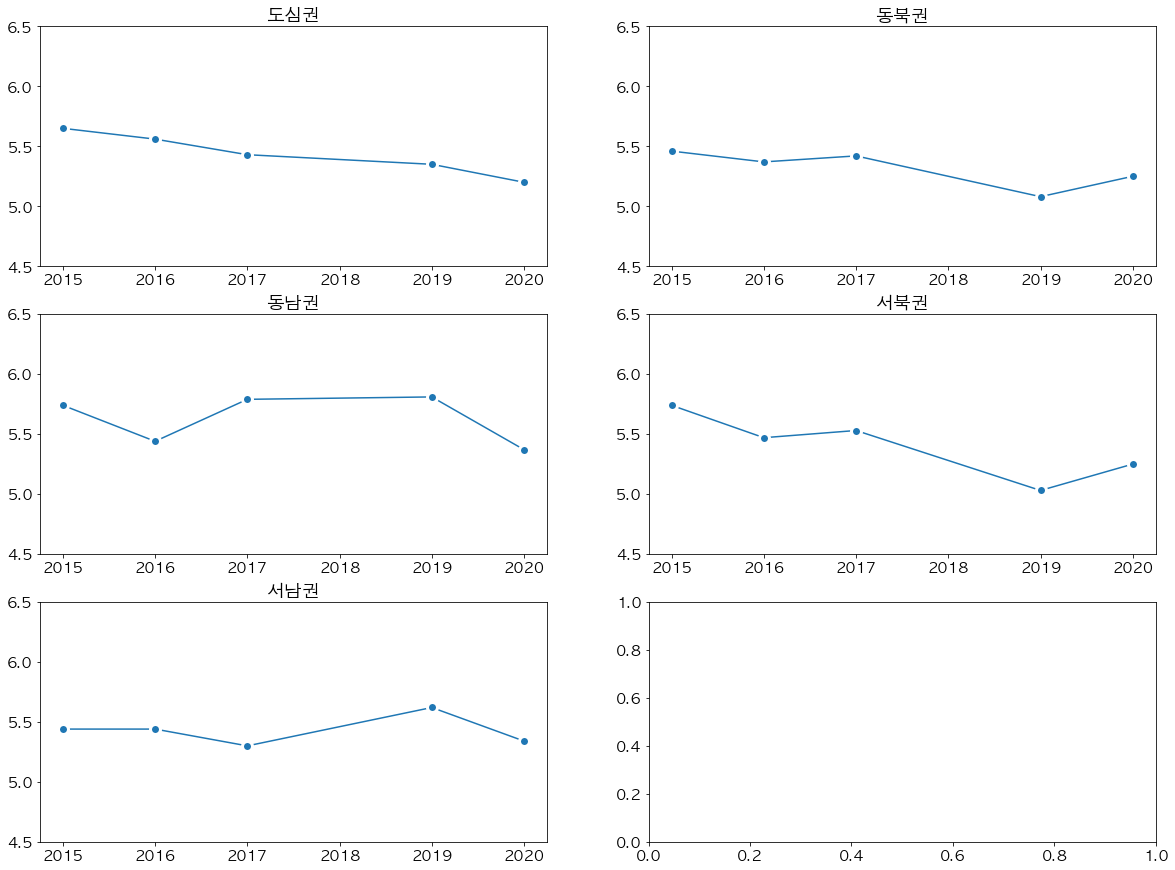

In [51]:
filt2015 = (sum_edu_seg_df['기간'] >= 2015)

# 지역별 filt 재정의 전체 기간 그래프 출력 원할시 위에 filter 변수 정의 실행 필요!
filtD = (sum_edu_seg_df[filt2015]['지역'] == '도심권')
filtEN = (sum_edu_seg_df[filt2015]['지역'] == '동북권')
filtES = (sum_edu_seg_df[filt2015]['지역'] == '동남권')
filtWN = (sum_edu_seg_df[filt2015]['지역'] == '서북권')
filtWS = (sum_edu_seg_df[filt2015]['지역'] == '서남권')

fix, ax2 = plt.subplots(3,2, figsize=(20,15))

ax2[0,0].plot(sum_edu_seg_df[filt2015][filtD]['기간'], sum_edu_seg_df[filt2015][filtD]['공교육 만족도'], label='도심권', marker='o', mec='w', mew=3, ms=10)
ax2[0,0].set_ylim(4.5,6.5)
ax2[0,0].set_title('도심권')

ax2[0,1].plot(sum_edu_seg_df[filt2015][filtEN]['기간'], sum_edu_seg_df[filt2015][filtEN]['공교육 만족도'], label='동북권', marker='o', mec='w', mew=3, ms=10)
ax2[0,1].set_ylim(4.5,6.5)
ax2[0,1].set_title('동북권')

ax2[1,0].plot(sum_edu_seg_df[filt2015][filtES]['기간'], sum_edu_seg_df[filt2015][filtES]['공교육 만족도'], label='동남권', marker='o', mec='w', mew=3, ms=10)
ax2[1,0].set_ylim(4.5,6.5)
ax2[1,0].set_title('동남권')

ax2[1,1].plot(sum_edu_seg_df[filt2015][filtWN]['기간'], sum_edu_seg_df[filt2015][filtWN]['공교육 만족도'], label='서북권', marker='o', mec='w', mew=3, ms=10)
ax2[1,1].set_ylim(4.5,6.5)
ax2[1,1].set_title('서북권')

ax2[2,0].plot(sum_edu_seg_df[filt2015][filtWS]['기간'], sum_edu_seg_df[filt2015][filtWS]['공교육 만족도'], label='서남권', marker='o', mec='w', mew=3, ms=10)
ax2[2,0].set_ylim(4.5,6.5)
ax2[2,0].set_title('서남권')

2018년의 데이터가 없는 점을 감안하더라도 공교육에 대한 만족도는 전체적으로 감소하고 있다. 5지역중 서남권만이 2019년 상승세를 보여줬지만 이 역시 2020년에는 다시 감소하였다. 서울 5지역 모두 새로운 교육과정이 도입된 2015년 보다 2020년 모두 낮은 점수를 기록했다.    

서울지역에서는 2015년부터 시작된 교육과정에서 공교육에 대해서 만족하지 못한 5년을 보냈다고 할 수 있다.

## 사교육 만족도
마찮가지로 같은 기간 사교육에 대한 만족도를 지역별로 살펴보자

Text(0.5, 1.0, '서남권')

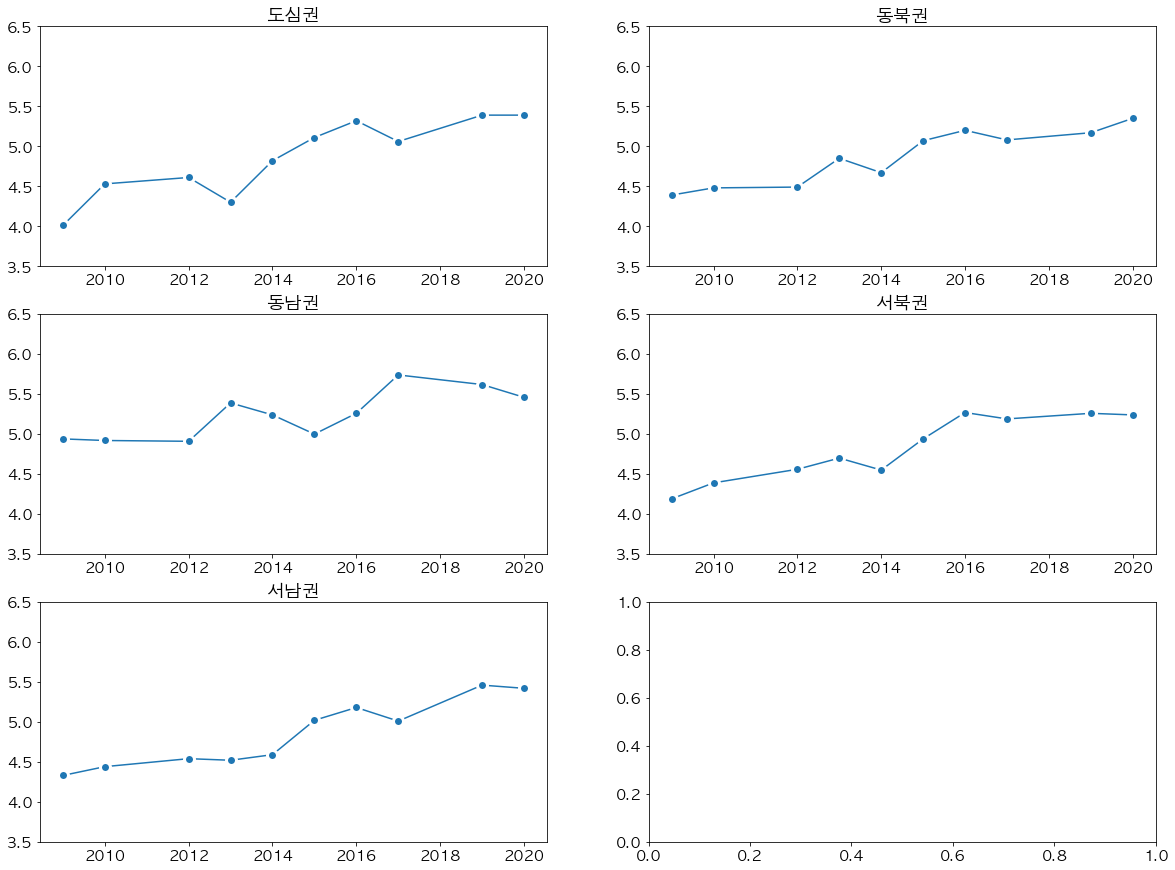

In [71]:
filtD = (sum_edu_seg_df['지역'] == '도심권')
filtEN = (sum_edu_seg_df['지역'] == '동북권')
filtES = (sum_edu_seg_df['지역'] == '동남권')
filtWN = (sum_edu_seg_df['지역'] == '서북권')
filtWS = (sum_edu_seg_df['지역'] == '서남권')

fix, ax2 = plt.subplots(3,2, figsize=(20,15))

ax2[0,0].plot(sum_edu_seg_df[filtD]['기간'], sum_edu_seg_df[filtD]['사교육 만족도'], label='도심권', marker='o', mec='w', mew=3, ms=10)
ax2[0,0].set_ylim(3.5,6.5)
ax2[0,0].set_title('도심권')

ax2[0,1].plot(sum_edu_seg_df[filtEN]['기간'], sum_edu_seg_df[filtEN]['사교육 만족도'], label='동북권', marker='o', mec='w', mew=3, ms=10)
ax2[0,1].set_ylim(3.5,6.5)
ax2[0,1].set_title('동북권')

ax2[1,0].plot(sum_edu_seg_df[filtES]['기간'], sum_edu_seg_df[filtES]['사교육 만족도'], label='동남권', marker='o', mec='w', mew=3, ms=10)
ax2[1,0].set_ylim(3.5,6.5)
ax2[1,0].set_title('동남권')

ax2[1,1].plot(sum_edu_seg_df[filtWN]['기간'], sum_edu_seg_df[filtWN]['사교육 만족도'], label='서북권', marker='o', mec='w', mew=3, ms=10)
ax2[1,1].set_ylim(3.5,6.5)
ax2[1,1].set_title('서북권')

ax2[2,0].plot(sum_edu_seg_df[filtWS]['기간'], sum_edu_seg_df[filtWS]['사교육 만족도'], label='서남권', marker='o', mec='w', mew=3, ms=10)
ax2[2,0].set_ylim(3.5,6.5)
ax2[2,0].set_title('서남권')

Text(0.5, 1.0, '서남권')

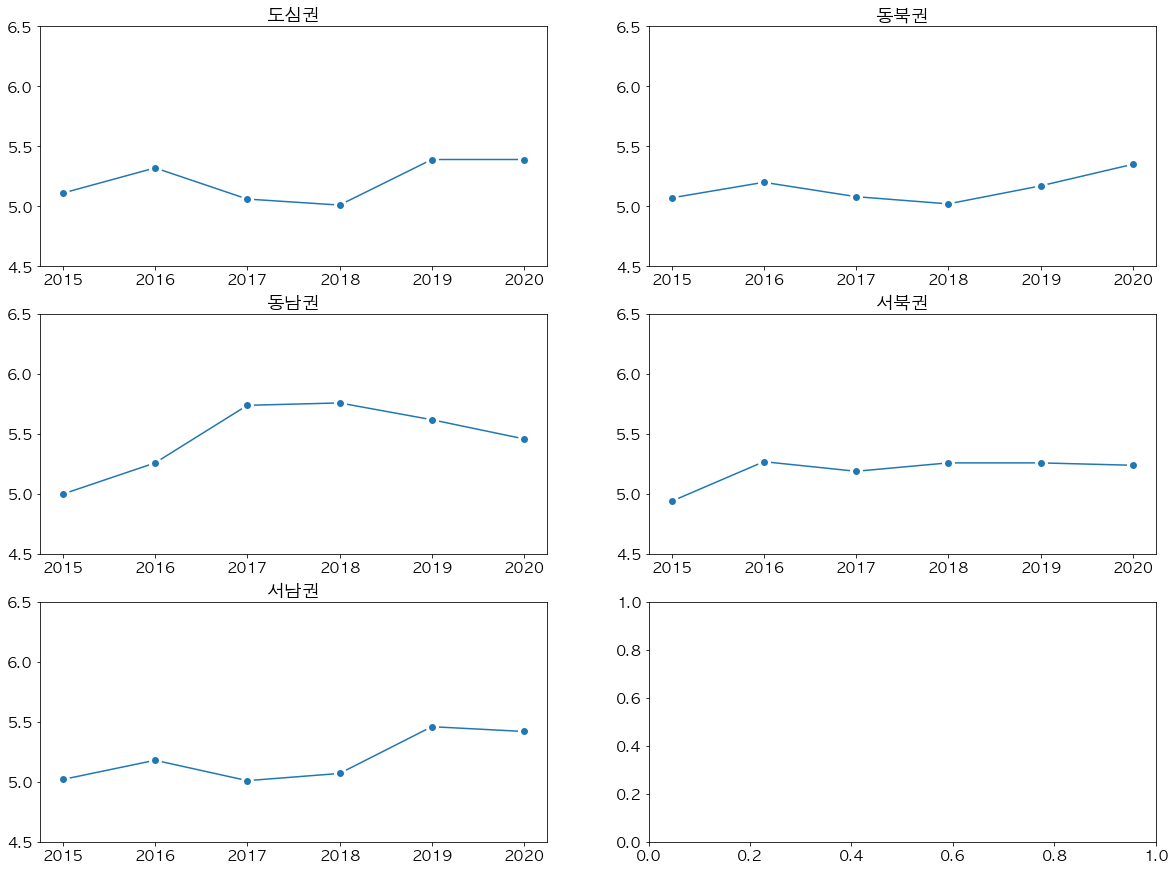

In [235]:
filt2015 = (sum_edu_seg_df['기간'] >= 2015)

# 지역별 filt 재정의 전체 기간 그래프 출력 원할시 위에 filter 변수 정의 실행 필요!
filtD = (sum_edu_seg_df[filt2015]['지역'] == '도심권')
filtEN = (sum_edu_seg_df[filt2015]['지역'] == '동북권')
filtES = (sum_edu_seg_df[filt2015]['지역'] == '동남권')
filtWN = (sum_edu_seg_df[filt2015]['지역'] == '서북권')
filtWS = (sum_edu_seg_df[filt2015]['지역'] == '서남권')

fix, ax3 = plt.subplots(3,2, figsize=(20,15))

ax3[0,0].plot(sum_edu_seg_df[filt2015][filtD]['기간'], sum_edu_seg_df[filt2015][filtD]['사교육 만족도'], label='도심권', marker='o', mec='w', mew=3, ms=10)
ax3[0,0].set_ylim(4.5,6.5)
ax3[0,0].set_title('도심권')

ax3[0,1].plot(sum_edu_seg_df[filt2015][filtEN]['기간'], sum_edu_seg_df[filt2015][filtEN]['사교육 만족도'], label='동북권', marker='o', mec='w', mew=3, ms=10)
ax3[0,1].set_ylim(4.5,6.5)
ax3[0,1].set_title('동북권')

ax3[1,0].plot(sum_edu_seg_df[filt2015][filtES]['기간'], sum_edu_seg_df[filt2015][filtES]['사교육 만족도'], label='동남권', marker='o', mec='w', mew=3, ms=10)
ax3[1,0].set_ylim(4.5,6.5)
ax3[1,0].set_title('동남권')

ax3[1,1].plot(sum_edu_seg_df[filt2015][filtWN]['기간'], sum_edu_seg_df[filt2015][filtWN]['사교육 만족도'], label='서북권', marker='o', mec='w', mew=3, ms=10)
ax3[1,1].set_ylim(4.5,6.5)
ax3[1,1].set_title('서북권')

ax3[2,0].plot(sum_edu_seg_df[filt2015][filtWS]['기간'], sum_edu_seg_df[filt2015][filtWS]['사교육 만족도'], label='서남권', marker='o', mec='w', mew=3, ms=10)
ax3[2,0].set_ylim(4.5,6.5)
ax3[2,0].set_title('서남권')

앞선 공교육의 그래프와 다르게 사교육의 그래프는 전체적으로 우상향 그래프를 보여준다. 변화율이 크지 않은 지역들도 있지만 2015년 새로운 교육과정이 도입될때 대비 모두 높은 점수를 받았다.  
  
2015년 새로운 교육과정 이후 서울 모든 지역은 이전의 사교육과 대비 만족한다는 결과를 알 수 있다  
  
강남권의 전체적인 점수가 높고 강북,도심권의 전체적인 점수가 낮게 분포되어있다. 이를 통해서 알 수 있는건 지역별로 만족도가 증/감할 수 있지만 세부적인 만족도는 강남쪽의 만족도 높다는 것을 알 수 있다.  
(아래는 5지역의 그래프를 한곳에 모아 표현하였다. 다소 보기 불편하지만 강남지역의 그래프가 강북지역의 그래프보다 높은 곳에 위치한 것을 알 수 있다.)

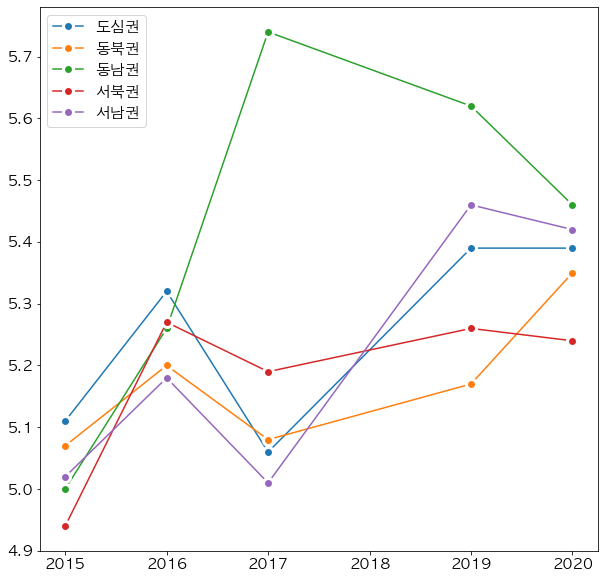

In [53]:
plt.figure(figsize=(10,10))
plt.plot(sum_edu_seg_df[filt2015][filtD]['기간'], sum_edu_seg_df[filt2015][filtD]['사교육 만족도'], label='도심권', marker='o', mec='w', mew=3, ms=10)
plt.plot(sum_edu_seg_df[filt2015][filtEN]['기간'], sum_edu_seg_df[filt2015][filtEN]['사교육 만족도'], label='동북권', marker='o', mec='w', mew=3, ms=10)
plt.plot(sum_edu_seg_df[filt2015][filtES]['기간'], sum_edu_seg_df[filt2015][filtES]['사교육 만족도'], label='동남권', marker='o', mec='w', mew=3, ms=10)
plt.plot(sum_edu_seg_df[filt2015][filtWN]['기간'], sum_edu_seg_df[filt2015][filtWN]['사교육 만족도'], label='서북권', marker='o', mec='w', mew=3, ms=10)
plt.plot(sum_edu_seg_df[filt2015][filtWS]['기간'], sum_edu_seg_df[filt2015][filtWS]['사교육 만족도'], label='서남권', marker='o', mec='w', mew=3, ms=10)
plt.legend()
plt.show()


그렇다면 지역별 사교육과 공교육의 만족도 차이를 봐보도록 하겠다.

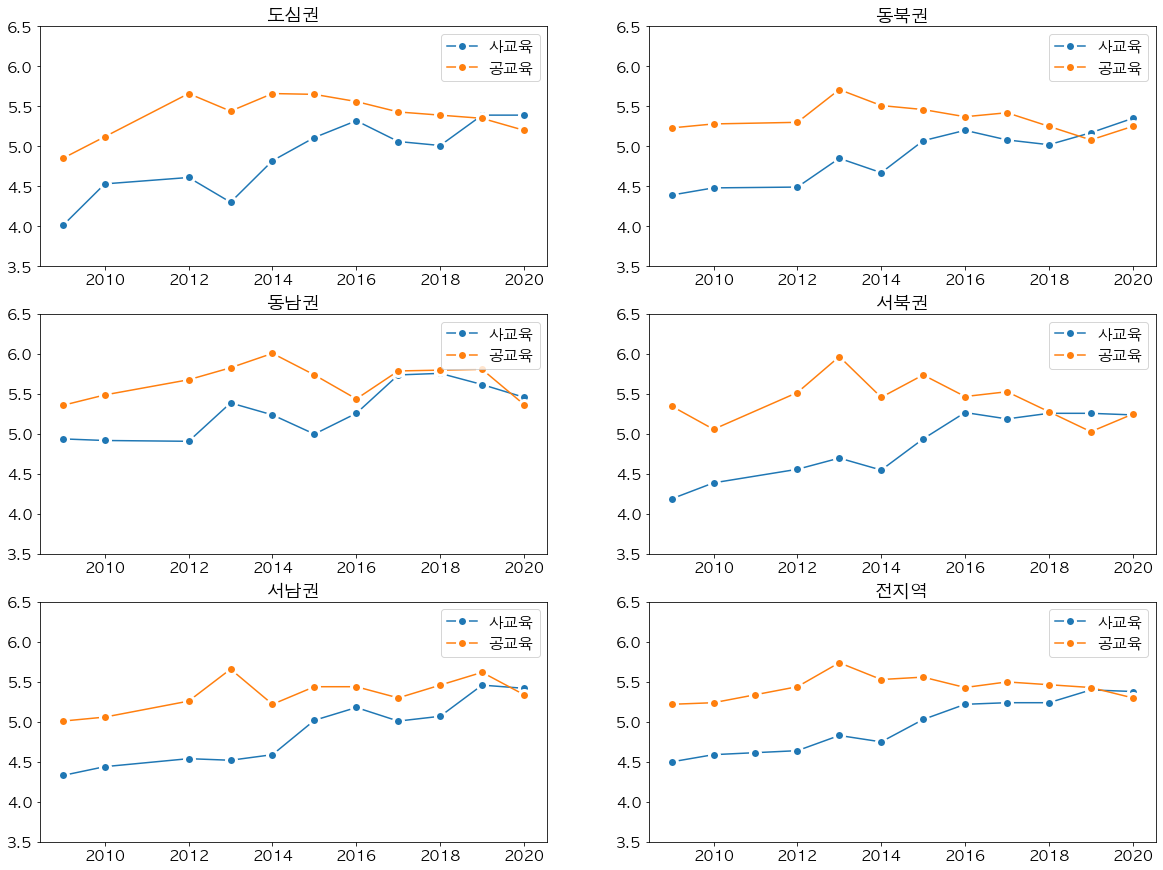

In [236]:
filtD = (sum_edu_seg_df['지역'] == '도심권')
filtEN = (sum_edu_seg_df['지역'] == '동북권')
filtES = (sum_edu_seg_df['지역'] == '동남권')
filtWN = (sum_edu_seg_df['지역'] == '서북권')
filtWS = (sum_edu_seg_df['지역'] == '서남권')

fix, ax2 = plt.subplots(3,2, figsize=(20,15))

ax2[0,0].plot(sum_edu_seg_df[filtD]['기간'], sum_edu_seg_df[filtD]['사교육 만족도'], label='사교육', marker='o', mec='w', mew=3, ms=10)
ax2[0,0].plot(sum_edu_seg_df[filtD]['기간'], sum_edu_seg_df[filtD]['공교육 만족도'], label='공교육', marker='o', mec='w', mew=3, ms=10)
ax2[0,0].set_ylim(3.5,6.5)
ax2[0,0].set_title('도심권')
ax2[0,0].legend()

ax2[0,1].plot(sum_edu_seg_df[filtEN]['기간'], sum_edu_seg_df[filtEN]['사교육 만족도'], label='사교육', marker='o', mec='w', mew=3, ms=10)
ax2[0,1].plot(sum_edu_seg_df[filtEN]['기간'], sum_edu_seg_df[filtEN]['공교육 만족도'], label='공교육', marker='o', mec='w', mew=3, ms=10)
ax2[0,1].set_ylim(3.5,6.5)
ax2[0,1].set_title('동북권')
ax2[0,1].legend()

ax2[1,0].plot(sum_edu_seg_df[filtES]['기간'], sum_edu_seg_df[filtES]['사교육 만족도'], label='사교육', marker='o', mec='w', mew=3, ms=10)
ax2[1,0].plot(sum_edu_seg_df[filtES]['기간'], sum_edu_seg_df[filtES]['공교육 만족도'], label='공교육', marker='o', mec='w', mew=3, ms=10)
ax2[1,0].set_ylim(3.5,6.5)
ax2[1,0].set_title('동남권')
ax2[1,0].legend()

ax2[1,1].plot(sum_edu_seg_df[filtWN]['기간'], sum_edu_seg_df[filtWN]['사교육 만족도'], label='사교육', marker='o', mec='w', mew=3, ms=10)
ax2[1,1].plot(sum_edu_seg_df[filtWN]['기간'], sum_edu_seg_df[filtWN]['공교육 만족도'], label='공교육', marker='o', mec='w', mew=3, ms=10)
ax2[1,1].set_ylim(3.5,6.5)
ax2[1,1].set_title('서북권')
ax2[1,1].legend()

ax2[2,0].plot(sum_edu_seg_df[filtWS]['기간'], sum_edu_seg_df[filtWS]['사교육 만족도'], label='사교육', marker='o', mec='w', mew=3, ms=10)
ax2[2,0].plot(sum_edu_seg_df[filtWS]['기간'], sum_edu_seg_df[filtWS]['공교육 만족도'], label='공교육', marker='o', mec='w', mew=3, ms=10)
ax2[2,0].set_ylim(3.5,6.5)
ax2[2,0].set_title('서남권')
ax2[2,0].legend()



ax2[2,1].plot(sum_edu_df['기간'], sum_edu_df['사교육 만족도'], label='사교육', marker='o', mec='w', mew=3, ms=10)
ax2[2,1].plot(sum_edu_df['기간'], sum_edu_df['공교육 만족도'], label='공교육', marker='o', mec='w', mew=3, ms=10)
ax2[2,1].set_ylim(3.5,6.5)
ax2[2,1].set_title('전지역')
ax2[2,1].legend()

plt.savefig('distribute_satifi_gu.png', dpi=300)


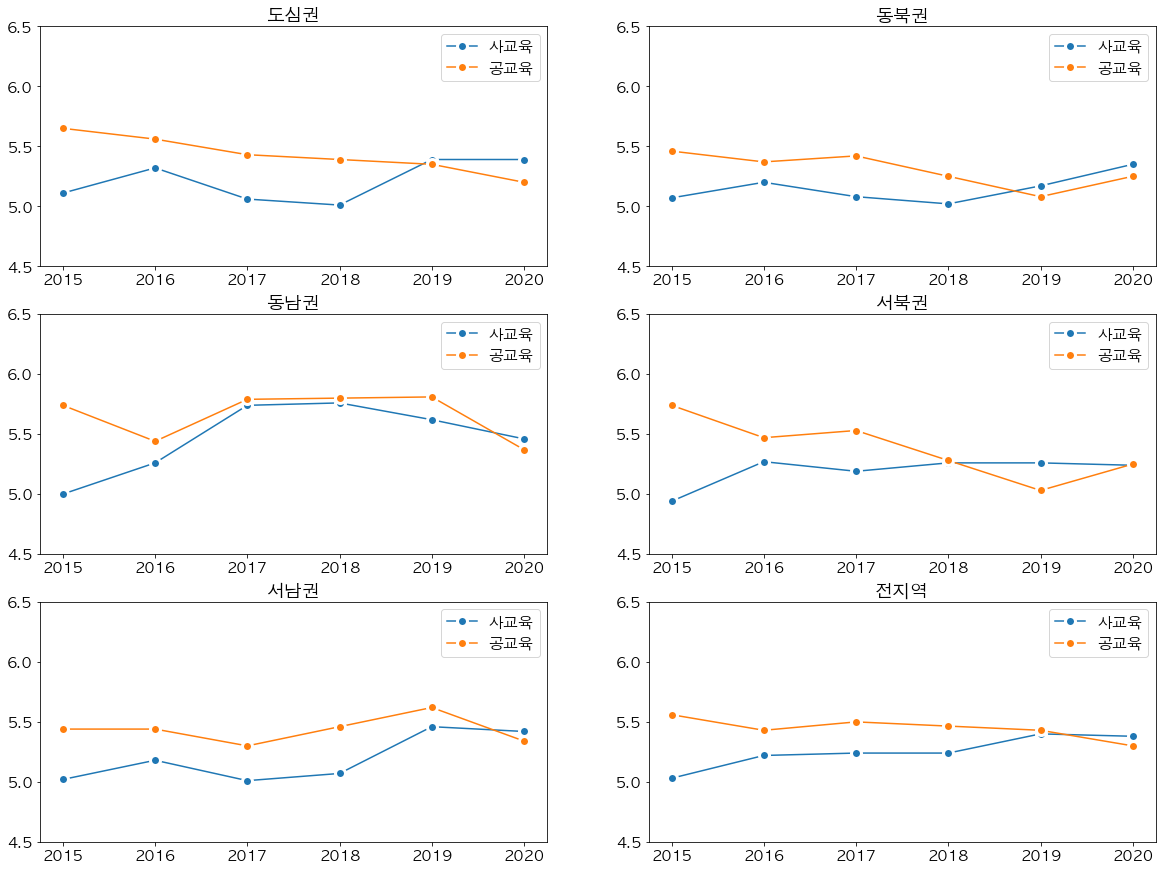

In [237]:
filt2015 = (sum_edu_seg_df['기간'] >= 2015)

filtD = (sum_edu_seg_df[filt2015]['지역'] == '도심권')
filtEN = (sum_edu_seg_df[filt2015]['지역'] == '동북권')
filtES = (sum_edu_seg_df[filt2015]['지역'] == '동남권')
filtWN = (sum_edu_seg_df[filt2015]['지역'] == '서북권')
filtWS = (sum_edu_seg_df[filt2015]['지역'] == '서남권')

fix, ax2 = plt.subplots(3,2, figsize=(20,15))

ax2[0,0].plot(sum_edu_seg_df[filt2015][filtD]['기간'], sum_edu_seg_df[filt2015][filtD]['사교육 만족도'], label='사교육', marker='o', mec='w', mew=3, ms=10)
ax2[0,0].plot(sum_edu_seg_df[filt2015][filtD]['기간'], sum_edu_seg_df[filt2015][filtD]['공교육 만족도'], label='공교육', marker='o', mec='w', mew=3, ms=10)
ax2[0,0].set_ylim(4.5,6.5)
ax2[0,0].set_title('도심권')
ax2[0,0].legend()

ax2[0,1].plot(sum_edu_seg_df[filt2015][filtEN]['기간'], sum_edu_seg_df[filt2015][filtEN]['사교육 만족도'], label='사교육', marker='o', mec='w', mew=3, ms=10)
ax2[0,1].plot(sum_edu_seg_df[filt2015][filtEN]['기간'], sum_edu_seg_df[filt2015][filtEN]['공교육 만족도'], label='공교육', marker='o', mec='w', mew=3, ms=10)
ax2[0,1].set_ylim(4.5,6.5)
ax2[0,1].set_title('동북권')
ax2[0,1].legend()

ax2[1,0].plot(sum_edu_seg_df[filt2015][filtES]['기간'], sum_edu_seg_df[filt2015][filtES]['사교육 만족도'], label='사교육', marker='o', mec='w', mew=3, ms=10)
ax2[1,0].plot(sum_edu_seg_df[filt2015][filtES]['기간'], sum_edu_seg_df[filt2015][filtES]['공교육 만족도'], label='공교육', marker='o', mec='w', mew=3, ms=10)
ax2[1,0].set_ylim(4.5,6.5)
ax2[1,0].set_title('동남권')
ax2[1,0].legend()

ax2[1,1].plot(sum_edu_seg_df[filt2015][filtWN]['기간'], sum_edu_seg_df[filt2015][filtWN]['사교육 만족도'], label='사교육', marker='o', mec='w', mew=3, ms=10)
ax2[1,1].plot(sum_edu_seg_df[filt2015][filtWN]['기간'], sum_edu_seg_df[filt2015][filtWN]['공교육 만족도'], label='공교육', marker='o', mec='w', mew=3, ms=10)
ax2[1,1].set_ylim(4.5,6.5)
ax2[1,1].set_title('서북권')
ax2[1,1].legend()

ax2[2,0].plot(sum_edu_seg_df[filt2015][filtWS]['기간'], sum_edu_seg_df[filt2015][filtWS]['사교육 만족도'], label='사교육', marker='o', mec='w', mew=3, ms=10)
ax2[2,0].plot(sum_edu_seg_df[filt2015][filtWS]['기간'], sum_edu_seg_df[filt2015][filtWS]['공교육 만족도'], label='공교육', marker='o', mec='w', mew=3, ms=10)
ax2[2,0].set_ylim(4.5,6.5)
ax2[2,0].set_title('서남권')
ax2[2,0].legend()

filtall = sum_edu_df['기간']>=2015

ax2[2,1].plot(sum_edu_df[filtall]['기간'], sum_edu_df[filtall]['사교육 만족도'], label='사교육', marker='o', mec='w', mew=3, ms=10)
ax2[2,1].plot(sum_edu_df[filtall]['기간'], sum_edu_df[filtall]['공교육 만족도'], label='공교육', marker='o', mec='w', mew=3, ms=10)
ax2[2,1].set_ylim(4.5,6.5)
ax2[2,1].set_title('전지역')
ax2[2,1].legend()

plt.savefig('distrubute_satifi_gu2.png', dpi = 300)

In [118]:
sum_edu_seg_df

,기간,지역,공교육 만족도,사교육 만족도
0,2009,도심권,4.85,4.01
1,2009,동북권,5.23,4.39
2,2009,서북권,5.35,4.19
3,2009,서남권,5.01,4.33
4,2009,동남권,5.36,4.94
5,2010,도심권,5.12,4.53
6,2010,동북권,5.28,4.48
7,2010,서북권,5.06,4.39
8,2010,서남권,5.06,4.44
9,2010,동남권,5.49,4.92


동남권과 서남권의 2019년 강남/강북의 상반된 반응이 있었던 결과를 제외한다면 공교육은 꾸준히 하락세를 보여주고 ㅇㅣㅆ고있다.
그렇다면 서울시에서 지출되는 사교육비에 대해서 알보도록 하자

## 서울시 사교육비
기간은 2015년 ~ 2021년으로 그 기간동안 지출된 사교육비를 초/중/고등학생으로 구분하고 특히 대학입시와 크게 관련된 고등학생의 경우 일반고의 사교육비용을 따로 알아보고 참여율에 대해서 알아보도록 하겠다.

In [265]:
per_edu = pd.read_excel('사교육비/사교육비지출만족도.xls', header = [0,1])

per_edu

기간 구분  학생 1인당 월평균 사교육비                         사교육 참여율              \
      기간 구분               평균  초등학교   중학교  고등학교   일반고      평균  초등학교   중학교   
0   2009  구분            33.1  30.5  32.6  37.7  43.3    79.6  88.8  76.9   
1   2010  구분            32.1  29.6  30.9  37.2  42.0    77.5  88.8  72.2   
2   2011  구분            32.8  30.4  31.8  37.4  42.7    77.0  87.7  73.4   
3   2012  구분            31.2  26.1  34.0  36.1  41.1    73.5  82.0  72.7   
4   2013  구분            32.8  28.4  34.9  37.1  42.7    75.0  84.8  74.7   
5   2014  구분            33.5  30.0  34.9  37.1  42.1    74.4  84.3  73.3   
6   2015  구분            33.8  29.6  35.5  38.3  43.6    74.3  82.9  74.1   
7   2016  구분            35.2  29.9  37.0  41.7  47.0    73.7  84.2  69.9   
8   2017  구분            39.1  34.1  41.7  44.5  51.8    77.6  86.5  76.0   
9   2018  구분            41.1  36.5  41.5  48.4  56.6    79.9  89.5  74.8   
10  2019  구분            45.1  38.5  46.3  55.6  65.2    80.0  87.6  77.2   
11  2020  구분            45.3  35.1  49.2  60.5  69.8    75.0  77.1  76.0   
12  2021  구분            52.9  47.3  52.6  63.4  73.5    81.5  87.6  78.4   

                
    고등학교   일반고  
0   67.3  74.2  
1   64.9  70.6  
2   64.2  71.2  
3   61.8  68.2  
4   61.6  68.4  
5   61.3  67.4  
6   61.8  68.2  
7   61.5  66.7  
8   65.5  72.6  
9   68.3  74.9  
10  68.9  77.3  
11  70.1  76.8  
12  73.4  80.7

In [125]:
47.3/35.1

1.3475783475783474

In [266]:
Tfilt = per_edu['기간']
Tfilt.name = '기간'
Pfilt = per_edu['학생 1인당 월평균 사교육비']
Pfilt.name = '사교육비'
Afilt = per_edu['사교육 참여율']
Afilt.name = '참여율'

#사교육비 지출
pay_edu = pd.concat([Tfilt, Pfilt],axis=1)
# print(pay_edu)

#사교육 참여율
attend_edu = pd.concat([Tfilt, Afilt], axis=1)
# print(attend_edu)


## 기간별 서울시 초/중/고 1인당 사교육비 지출

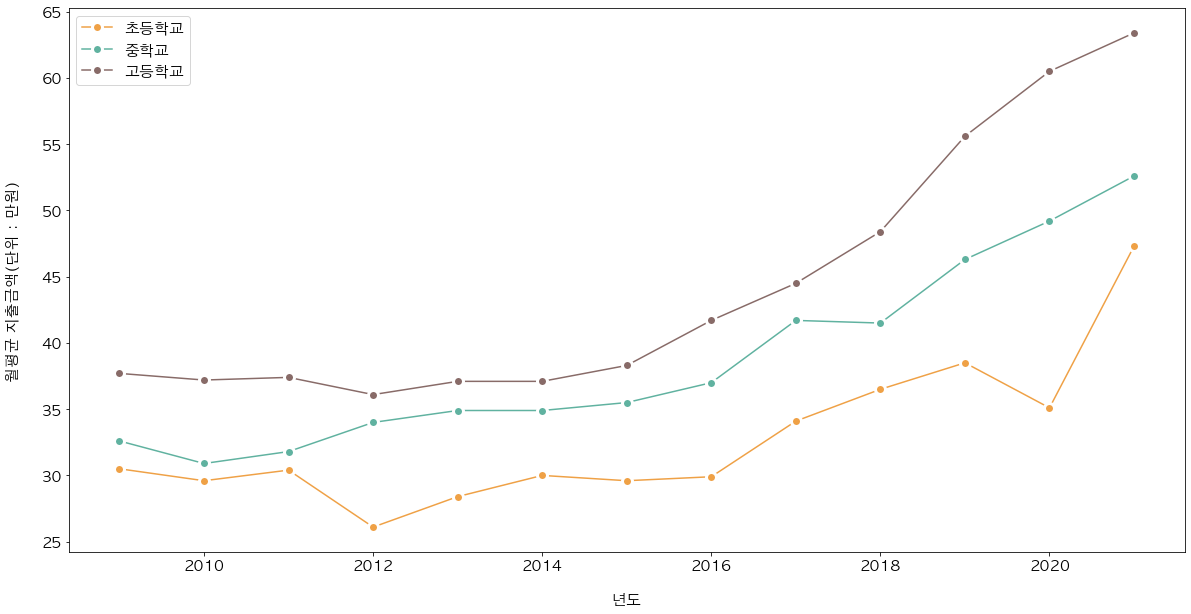

In [286]:
plt.figure(figsize=(20,10))
plt.plot(pay_edu['기간'], pay_edu['초등학교'], label='초등학교', marker='o', mec='w', mew=3, ms=10, c='#efa146')
plt.plot(pay_edu['기간'], pay_edu['중학교'], label='중학교', marker='o', mec='w', mew=3, ms=10, c='#60b2a0')
plt.plot(pay_edu['기간'], pay_edu['고등학교'], label='고등학교', marker='o', mec='w', mew=3, ms=10,c= '#886b68')
plt.legend()
plt.ylabel('월평균 지출금액(단위 : 만원)', labelpad=20)
plt.xlabel('년도', labelpad=20)

plt.savefig('PayToEdu.png', dpi=300)

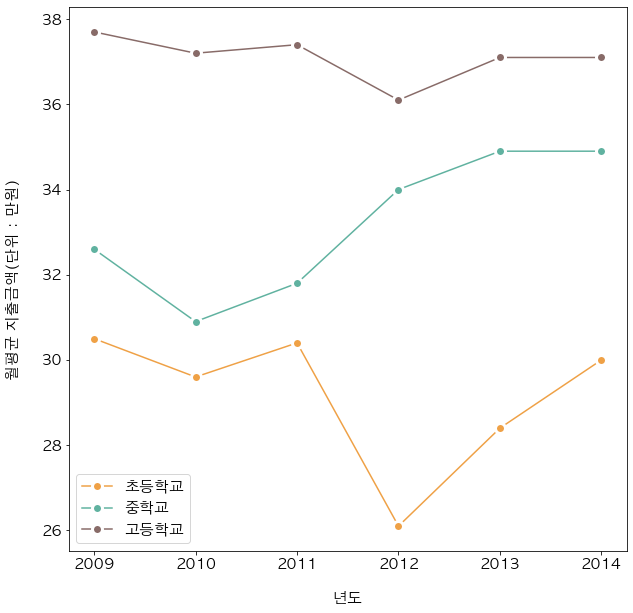

In [272]:
payfilt2015 = (pay_edu['기간'] < 2015)

plt.figure(figsize=(10,10))
plt.plot(pay_edu[payfilt2015]['기간'], pay_edu[payfilt2015]['초등학교'], label='초등학교', marker='o', mec='w', mew=3, ms=10, c='#efa146')
plt.plot(pay_edu[payfilt2015]['기간'], pay_edu[payfilt2015]['중학교'], label='중학교', marker='o', mec='w', mew=3, ms=10, c='#60b2a0')
plt.plot(pay_edu[payfilt2015]['기간'], pay_edu[payfilt2015]['고등학교'], label='고등학교', marker='o', mec='w', mew=3, ms=10,c= '#886b68')
plt.legend()
plt.ylabel('월평균 지출금액(단위 : 만원)', labelpad=20)
plt.xlabel('년도', labelpad=20)

plt.savefig('PayToEdu_2015before.png', dpi=300)

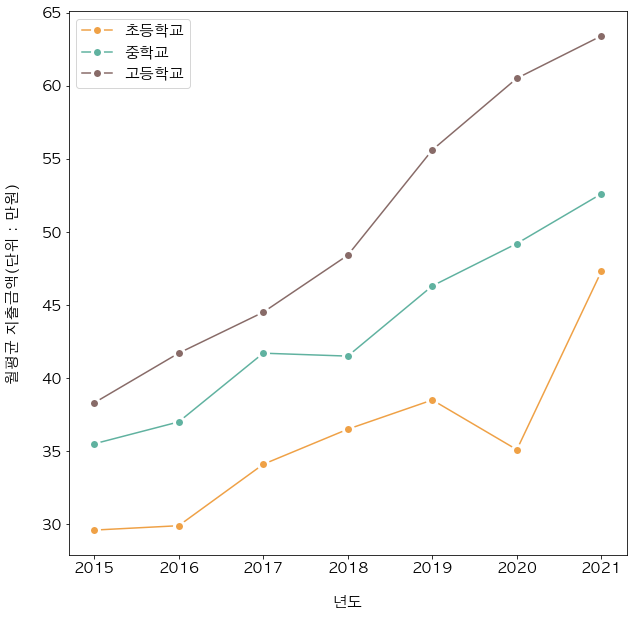

In [273]:
payfilt2015 = (pay_edu['기간'] < 2015)

plt.figure(figsize=(10,10))
plt.plot(pay_edu[~payfilt2015]['기간'], pay_edu[~payfilt2015]['초등학교'], label='초등학교', marker='o', mec='w', mew=3, ms=10, c='#efa146')
plt.plot(pay_edu[~payfilt2015]['기간'], pay_edu[~payfilt2015]['중학교'], label='중학교', marker='o', mec='w', mew=3, ms=10, c='#60b2a0')
plt.plot(pay_edu[~payfilt2015]['기간'], pay_edu[~payfilt2015]['고등학교'], label='고등학교', marker='o', mec='w', mew=3, ms=10,c= '#886b68')
plt.legend()
plt.ylabel('월평균 지출금액(단위 : 만원)', labelpad=20)
plt.xlabel('년도', labelpad=20)

plt.savefig('PayToEdu_2015after.png', dpi=300)

그래프를 보면 단번에 알 수 있듯 모든 기간의 고등학생의 사교육 지출비용이 가장 높고 초등학생의 사교육 지출비용이 가장 낮다.  
상대적으로 교육에 대한 단가가 높거나 들어야하는 과목의 수가 증감해서라고 추측할 수 있다.  
다만 모든 그래프가 우상향하는 그래프를 보여주는데 특이하게 2020년에 초등학생의 사교육비 지출만이 큰폭으로 감소했다. 이부분에 대해서 알아 볼 필요가 있다.  
아마도 2020년도에는 코로나로 인해서 학교에 등교하지 않아 사교육의 중요성이 더 높아졌을 것으로 예상 가능하지만 연령이 낮아 바이러스에 취약하여 부모들이 교육보다는 건강을 택한 것으로 볼 수 있다. 하지만 다음해인 2021년에 2020년의 감소와는 상관없다는 듯 원래 증가 추세로 도달할 법한 금액을 보여주었다.  
  
그렇다면 2020년에 감소가 예상대로 사교육에 참여하지 않아서 큰폭의 감소가 나타난것인지 알아보기 위해서 기간별 사교육 참여율에 대한 그래프를 그려보자. 그리고 큰폭으로 감소했던 초등학생의 그래프를 자세히 보도록 하겠다

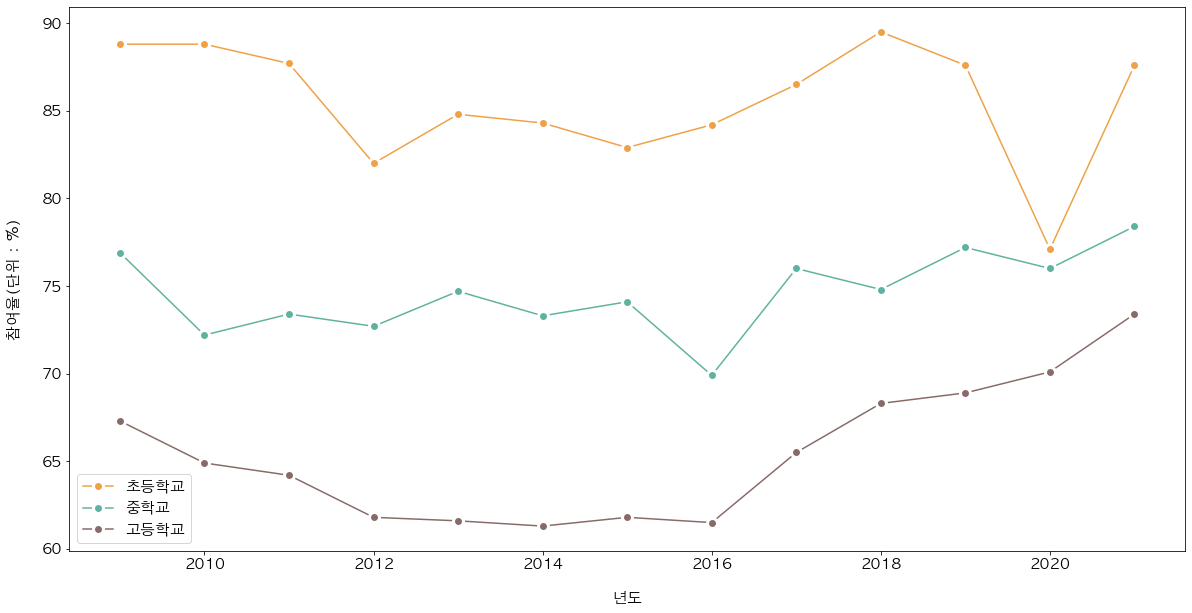

In [285]:
plt.figure(figsize=(20,10))
plt.plot(attend_edu['기간'], attend_edu['초등학교'], label='초등학교', marker='o', mec='w', mew=3, ms=10, c='#efa146')
plt.plot(attend_edu['기간'], attend_edu['중학교'], label='중학교', marker='o', mec='w', mew=3, ms=10,c='#60b2a0')
plt.plot(attend_edu['기간'], attend_edu['고등학교'], label='고등학교', marker='o', mec='w', mew=3, ms=10,c= '#886b68')
plt.legend(),
plt.ylabel('참여율(단위 : %)', labelpad=20)
plt.xlabel('년도', labelpad=20)
plt.savefig('Attend_S.png', dpi=300)

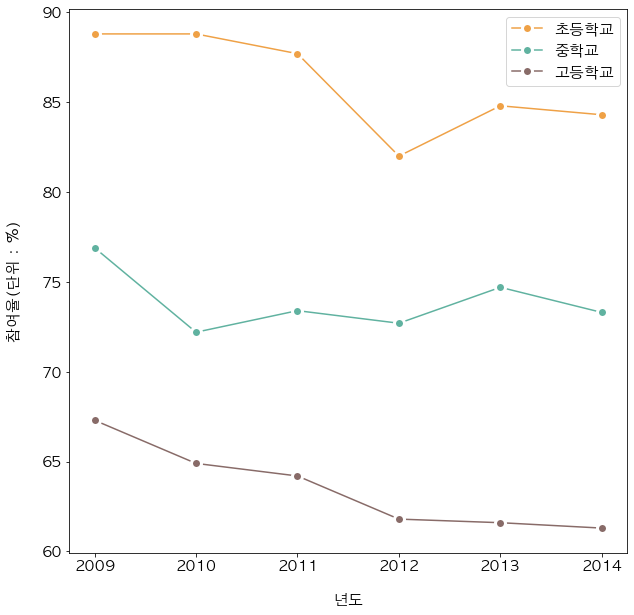

In [276]:
attendfilt2015 = (attend_edu['기간'] < 2015)

plt.figure(figsize=(10,10))
plt.plot(attend_edu[attendfilt2015]['기간'], attend_edu[attendfilt2015]['초등학교'], label='초등학교', marker='o', mec='w', mew=3, ms=10, c='#efa146')
plt.plot(attend_edu[attendfilt2015]['기간'], attend_edu[attendfilt2015]['중학교'], label='중학교', marker='o', mec='w', mew=3, ms=10,c='#60b2a0')
plt.plot(attend_edu[attendfilt2015]['기간'], attend_edu[attendfilt2015]['고등학교'], label='고등학교', marker='o', mec='w', mew=3, ms=10,c= '#886b68')
plt.legend(),
plt.ylabel('참여율(단위 : %)', labelpad=20)
plt.xlabel('년도', labelpad=20)
plt.savefig('Attend_S_2015before.png', dpi=300)

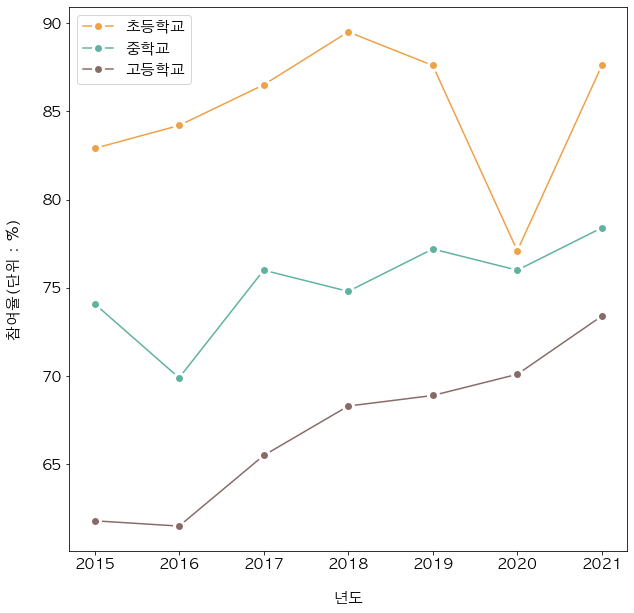

In [277]:
attendfilt2015 = (attend_edu['기간'] < 2015)

plt.figure(figsize=(10,10))
plt.plot(attend_edu[~attendfilt2015]['기간'], attend_edu[~attendfilt2015]['초등학교'], label='초등학교', marker='o', mec='w', mew=3, ms=10, c='#efa146')
plt.plot(attend_edu[~attendfilt2015]['기간'], attend_edu[~attendfilt2015]['중학교'], label='중학교', marker='o', mec='w', mew=3, ms=10,c='#60b2a0')
plt.plot(attend_edu[~attendfilt2015]['기간'], attend_edu[~attendfilt2015]['고등학교'], label='고등학교', marker='o', mec='w', mew=3, ms=10,c= '#886b68')
plt.legend(),
plt.ylabel('참여율(단위 : %)', labelpad=20)
plt.xlabel('년도', labelpad=20)
plt.savefig('Attend_S_2015after.png', dpi=300)

그래프 결과는 예상한대로 나왔다.  
  
그래프는 전체적으로 우상향 그래프를 그리고 있고 사교육비에 대한 그래프를 통해서 유추했듯 2020년에 초등학생의 사교육 참여율이 매우 큰 폭으로 감소했다.  
  
위 그래프를 통해서 알 수 있는 것은 고등학년으로 갈수록 사교육의 참여율이 감소하지만 그 차이가 시간이 갈수록 줄어들고 있다는것이다. 즉 2021년 기준 초/중/고등학생들의 사교육 참여비율은 약 81.5%이다. 2015년 대비 9.6%증가하였다. 초/중/고 각각 5.6%, 5.8%, 18.7% 상승하였다. 그렇다면 사교육비의 증가율은 어떻게 될까. 우선 2021년 기준 고등학생 1인당 월사교육 지출비용은 약 63.4만원 일반고학생의 경우 무려 73.5만원이다. 이 금액이 절대 적은 금액은 아니지만 2021년만 봐서는 감이 크게 잡히지 않기에 각각의 금액을 2015년과 비교해보겠다.  
  
초등학교(2015 / 2021) :   29.6 / 47.3 (증가율 : 약 60%)  
중학교(2015 / 2021) :   33.5 / 52.6 (증가율 : 약 57%)  
고학교(2015 / 2021) :   38.3 / 63.4 (증가율 : 약 66%)  
일반고(2015 / 2021) : 43.6 / 73.5 (증가율 : 약 69%)  
  
반면 서울시 임금상승률은 약 20%이다.(2015/2021 서울시 월 평균 임금 : 3,261,561 / 3,904,436 [만원])  
  
증가율로는 큰 차이로 보이기에 해당 년도의 평균 임금에 각각 얼마를 차지했는지 그래프로 보도록 하자  

In [283]:
income2015 = 326.1
income2021 = 390.4
income2009 = 212.2

x = ['초등학교','중학교','고등학교']
for i in range(0,13):
    if (i == 0):
        elemental09 = pay_edu.iloc[i]['초등학교']/income2009
        middle09 = pay_edu.iloc[i]['중학교']/income2009
        high09 = pay_edu.iloc[i]['고등학교']/income2009
        
        print(pay_edu.iloc[i]['초등학교'])
    
    if (i == 6):
        elemental15 = pay_edu.iloc[i]['초등학교']/income2015
        middle15 = pay_edu.iloc[i]['중학교']/income2015
        high15 = pay_edu.iloc[i]['고등학교']/income2015

    if (i == 12):
        elemental21 = pay_edu.iloc[i]['초등학교']/income2021
        middle21 = pay_edu.iloc[i]['중학교']/income2021
        high21 = pay_edu.iloc[i]['고등학교']/income2021

        

30.5


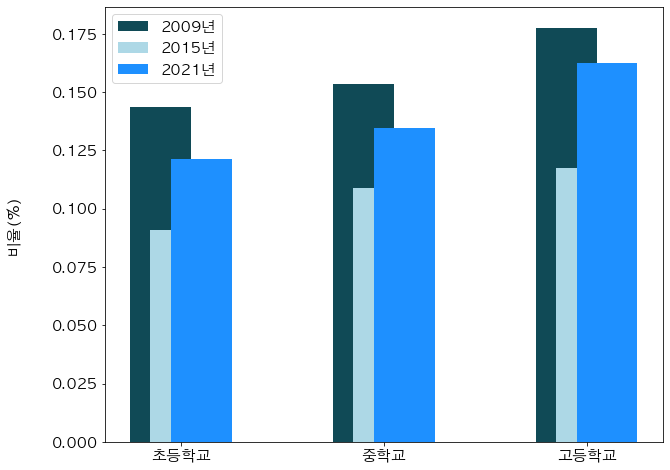

In [282]:
temp2021 = [elemental21, middle21, high21]
index = np.arange(3)
plt.figure(figsize=(10,8))

plt.bar(index-0.1, [elemental09, middle09, high09], width = 0.3, label ='2009년', color='#104a56')
plt.bar(index, [elemental15, middle15, high15], width = 0.3, label ='2015년', color='#ADD8E6')
bar2021 = plt.bar(index+0.1, [elemental21, middle21, high21],width = 0.3, label = '2021년', color='#1E90FF')
plt.xticks(index, x)
plt.legend()
plt.ylabel('비율(%)', labelpad= 30)


# for idx, rect in enumerate(bar2021):
#     plt.text(idx+0.1,rect.get_height()+0.0025, round(temp2021[idx],2), ha='center', color='#000080')
plt.savefig('EduPayInCome.png', dpi = 300)

## 

그래프를 보면 한눈에 확인 할 수 있다. 우리나라의 월평균 임금 대비 사교육비로 지출하는 비용이 한 교육과정 내에서 적게는 2% 많이는 4% 증가한 것을 볼 수 있다. 

그렇다면 사교육비가 임금 상승대비 왜 더 빠르게 증가하고 있는지에 대해서 알아볼 필요가 있다.

아마 조금 더 수준 높은 교육을 받기 위한 방법들이 서비스라는 명목하에 사교육비가 빠르게 증가 한 것으로 보인다.  
  
이렇게 빠르게 증가하고 있는 이유는 경제활동을 하고 있는 부모들의 영향이 가장 크다고 생각되는데 그렇다면 서울시 부모들의 자녀의 기대교육수준이 어느정도이고 그 이유가 무엇인지 알아보도록 하겠다.  
이 자료는 2010년부터 시행된 조사자료로 2년 주기로 조사되었다.

## 부모의 기대교육 목적 조사

In [61]:
path = '기대교육/'
file_list = os.listdir(path)
    
file_list_py = [file for file in file_list if file.endswith('.xls')]
file_list_py.sort()



for i in file_list_py:
    expect_edu = pd.read_excel('기대교육/' + i, header=[0,1])
    if (file_list_py[0] == i):
        expect_edu1012_df = expect_edu
    elif(file_list_py[1] == i):
        expect_edu1012_df = expect_edu1012_df.append(expect_edu, ignore_index=True)
    else:
        if(file_list_py[2] ==i):
            expect_edu_df = expect_edu
        else:
            expect_edu_df = expect_edu_df.append(expect_edu, ignore_index=True)
        

# temp_df = expect_edu1012_df['부모의 자녀 기대 교육 목적']
# combine_df = temp_df[0:1]
# combine_df.dropna(axis=1, inplace=True)
# combine_df.columns



## 10,12년 + 14~ 20년 기대교육 목적 병합

In [62]:
combine_0 = expect_edu1012_df[('기간','기간')]
combine_0.name = '년도'
combine_1 = expect_edu1012_df[('부모의 자녀 기대 교육 목적', '좋은 직업을 갖기위해')]
combine_1.name = '미래의 직업'
combine_2 = expect_edu1012_df[('부모의 자녀 기대 교육 목적', '취미와 소질 개발')]
combine_2.name = '능력과 소질 개발'
combine_3 = expect_edu1012_df[('부모의 자녀 기대 교육 목적', '부모가 받지 못한 교육 보상')]
combine_3.name = '부모의 보상심리'
combine_4 = expect_edu1012_df[('부모의 자녀 기대 교육 목적', '결혼 친구관계등 사회적으로 유리해서')]
combine_4.name = '사회적 관계'
combine_5 = expect_edu1012_df[('부모의 자녀 기대 교육 목적', '인격 교양을 쌓기 위해')]
combine_5.name = '인격 교양'
combine_6 = expect_edu1012_df[('부모의 자녀 기대 교육 목적', '기타')]
combine_6.name = '기타'

combine_df = pd.DataFrame([combine_0,combine_1,combine_2,combine_3,combine_4,combine_5, combine_6])


combine_1 = expect_edu_df[('기간', '기간')]
combine_1.name = '년도'
combine_2 = expect_edu_df[('부모의 자녀 기대 교육 목적', '결혼친구관계등 사회적 관계에 유리해지게 하기 위해')]
combine_2.name = '사회적 관계'
combine_3 = expect_edu_df[('부모의 자녀 기대 교육 목적','능력과 소질을 개발하게 하기 위해')]
combine_3.name = '능력과 소질 개발'
combine_4 = expect_edu_df[('부모의 자녀 기대 교육 목적', '부모가 받지 못한 교육을 자녀를 통해 보상받고 싶어서')]
combine_4.name = '부모의 보상심리'
combine_5 = expect_edu_df[('부모의 자녀 기대 교육 목적', '인격 교양을 쌓게 하기 위해')]
combine_5.name = '인격 교양'
combine_6 = expect_edu_df[('부모의 자녀 기대 교육 목적', '좋은 직업을 갖게 하기 위해')]
combine_6.name = '미래의 직업'  
combine_7 = expect_edu_df[('부모의 자녀 기대 교육 목적', '기타')]
combine_7.name = '기타'                            

combine_df = pd.concat([combine_df.T,pd.DataFrame([combine_1,combine_2,combine_3,combine_4,combine_5,combine_6,combine_7]).T], ignore_index=True)
combine_df = combine_df.fillna(0)

combine_df.drop(columns = '기타', inplace=True)
combine_df


,년도,미래의 직업,능력과 소질 개발,부모의 보상심리,사회적 관계,인격 교양
0,2010.0,43.7,10.4,1.1,11.4,32.7
1,2012.0,48.3,10.2,1.2,7.7,32.5
2,2014.0,44.3,40.5,0.3,7.0,8.0
3,2016.0,44.3,40.9,0.3,7.2,6.8
4,2018.0,42.8,45.7,0.5,4.2,6.8
5,2020.0,42.1,46.1,0.5,4.4,6.9


기타는 수치가 모든 년도 1% 미만, 0%인 해가 있기 때문에 그래프 도출 이전에 제외

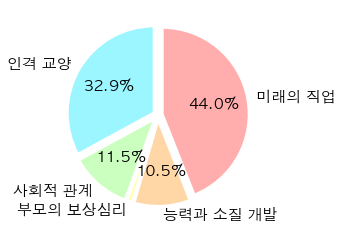

In [63]:
def custom_autopct(pct):
    #return ('%.1f%%' %pct) if pct>=10 else ''
    return '{:.1f}%'.format(pct) if pct>=10 else ''

values = combine_df.iloc[0,1:].array
labels = combine_df.columns[1:]
colors = ['#ffadad', '#ffd6a5', '#fdffb6', '#caffbf', '#9bf6ff']
explode = [0.05] * 5
wedgeprops = {'width':1, 'edgecolor':'w', 'linewidth' : 3}

plt.pie(values, labels = labels, autopct = custom_autopct, startangle=90, counterclock = False, colors = colors, explode = explode, wedgeprops = wedgeprops)
plt.show()


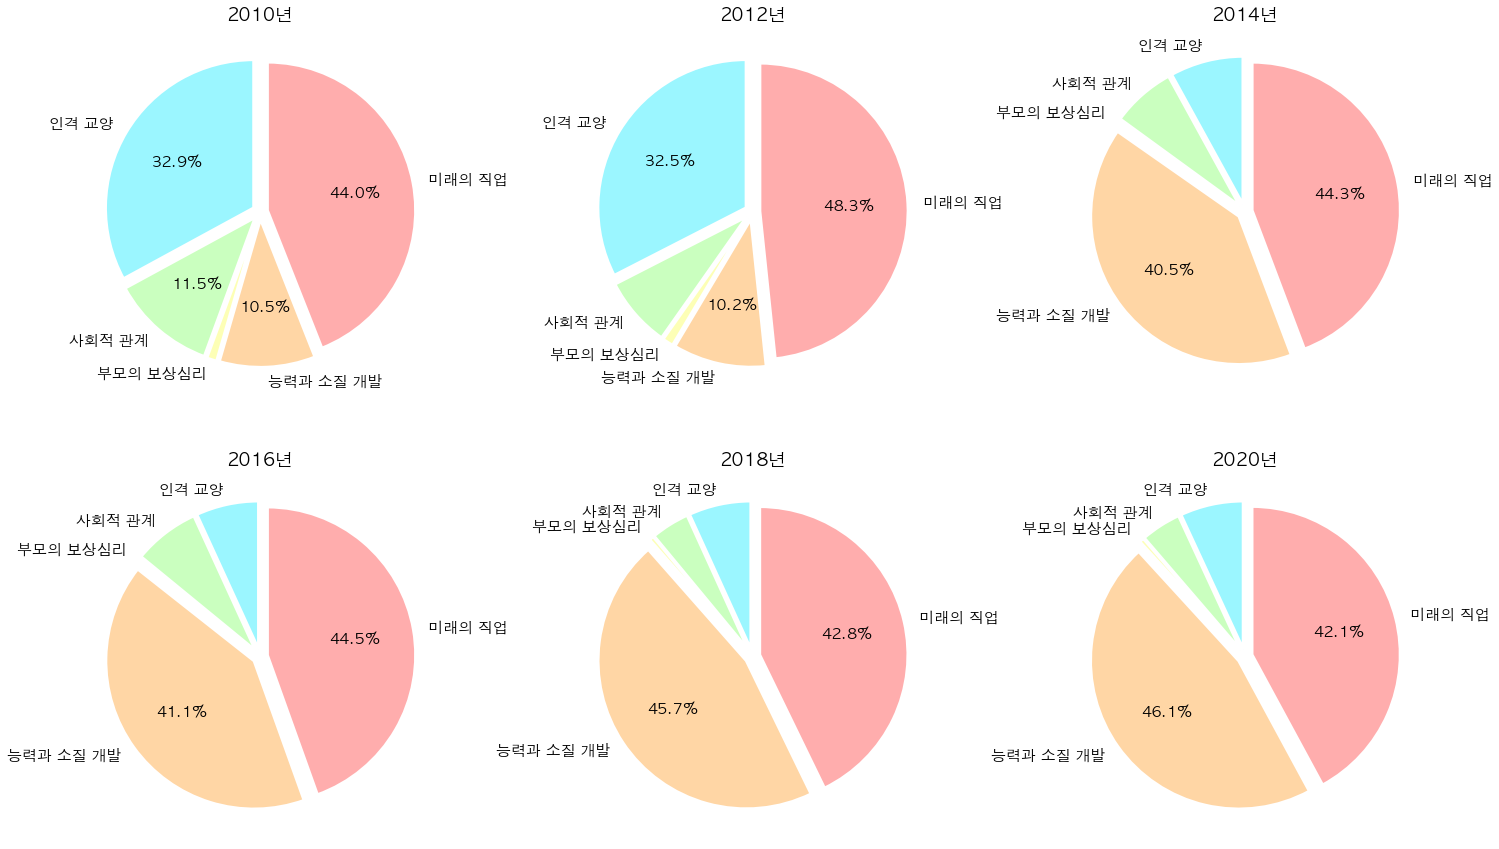

In [287]:
fix, ax3 = plt.subplots(2,3, figsize=(25,15))

values = combine_df.iloc[0,1:].array
ax3[0,0].pie(values, labels = labels, autopct = custom_autopct, startangle=90, counterclock = False, colors = colors, explode = explode, wedgeprops = wedgeprops)
ax3[0,0].set_title('2010년')

values = combine_df.iloc[1,1:].array
ax3[0,1].pie(values, labels = labels, autopct = custom_autopct, startangle=90, counterclock = False, colors = colors, explode = explode, wedgeprops = wedgeprops)
ax3[0,1].set_title('2012년')

values = combine_df.iloc[2,1:].array
ax3[0,2].pie(values, labels = labels, autopct = custom_autopct, startangle=90, counterclock = False, colors = colors, explode = explode, wedgeprops = wedgeprops)
ax3[0,2].set_title('2014년')

values = combine_df.iloc[3,1:].array
ax3[1,0].pie(values, labels = labels, autopct = custom_autopct, startangle=90, counterclock = False, colors = colors, explode = explode, wedgeprops = wedgeprops)
ax3[1,0].set_title('2016년')

values = combine_df.iloc[4,1:].array
ax3[1,1].pie(values, labels = labels, autopct = custom_autopct, startangle=90, counterclock = False, colors = colors, explode = explode, wedgeprops = wedgeprops)
ax3[1,1].set_title('2018년')

values = combine_df.iloc[5,1:].array
ax3[1,2].pie(values, labels = labels, autopct = custom_autopct, startangle=90, counterclock = False, colors = colors, explode = explode, wedgeprops = wedgeprops)
ax3[1,2].set_title('2020년')

plt.savefig('forEdu.png', dpi=300)

그래프를 보면 알 수 있지만 미래의 직업에 대한 목적이 10년간 상위 항목에 위치했다  
주목해서 볼 점은 '인격교양'항목이 2014년부터 현격히 줄고 '능력과 소질 개발'이 급증했는데 이는 2014년부터 설문지의 내용이 변경되었다는 점에서 질문 항목중 인격 교양에 영향을 많이 주는 항목의 분류가 능력과 소질 개발로 옮겨졌을 가능성이 크다.
그렇다면 5가지 항목중 '부모의 보상심리'를 제외하고 변화그래프를 통해 자세히 알아보겠다.

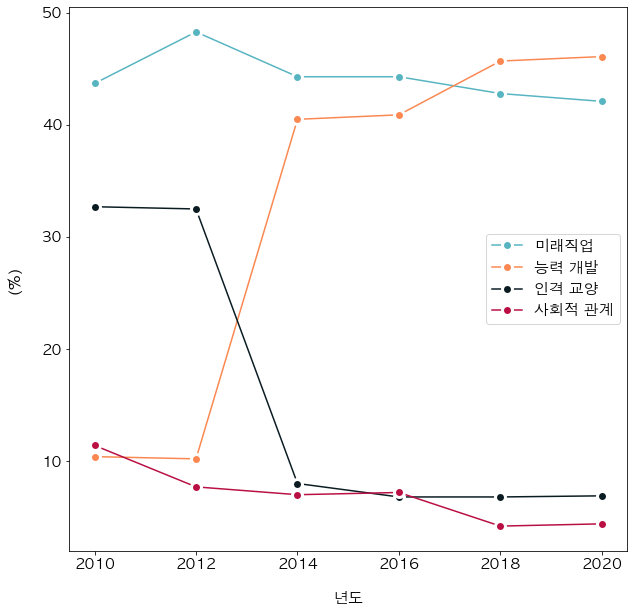

In [263]:
plt.figure(figsize=(10,10))
plt.plot(combine_df['년도'], combine_df['미래의 직업'] ,label='미래직업', marker='o', mec='w', mew=3, ms=10, c='#57b4c1')
plt.plot(combine_df['년도'], combine_df['능력과 소질 개발'] , label = '능력 개발', marker='o', mec='w', mew=3, ms=10, c='#fb8851')
plt.plot(combine_df['년도'], combine_df['인격 교양'], label = '인격 교양', marker='o', mec='w', mew=3, ms=10, c='#0a1c22')
plt.plot(combine_df['년도'], combine_df['사회적 관계'], label = '사회적 관계', marker='o', mec='w', mew=3, ms=10,c='#b90f43')

plt.legend()

plt.ylabel('(%)', labelpad=20)
plt.xlabel('년도', labelpad=20)
plt.savefig('ForEud2.png', dpi= 300)

미래의 직업에 대한 기대는 여전히 상위권이지만 2018년을 기점으로 능력 개발에 1위를 내주었다. 이는 막연하게 교육의 기본인 공부를 하게 되면 미래에 직업을 고르는데 유리할 것이라고 생각했던 부모들의 생각이 능력이 있어야 살아남을 수 있다는 사회적 변화의 흐름에 맞추어 바뀐 것으로 보인다. 그래도 여전히 미래직업에 대한 걱정은 여전하지만 감소하고 있는 추세로 보아 능력 중심의 사회가 고도화 될 수록 미래 직업과 능력 개발의 항목은 사실 같은 항목이 될 가능성이 크다고 본다.  
  
특이한 점은 '인격 교양' 항목의 급격한 하락과 '능력 개발'의 급격한 상승인데 추론해볼 수 있는 경우는 2014년 설문지의 변동이 있었고 그로 인해서 이 비율이 바뀌었다는 것인데, 아마 인격 교양항목에서 큰 비중을 차지하던 질문 항목의 분류가 능력 개발의 분류로 변경 됐을 가능성이 매우 높다. 이러한 변화가 있었지만 2014년 이후로 '능력 개발' 항목의 꾸준한 상승세는 시대적 흐름이 능력 위주의 사회가 형성 되다보니 부모들의 기대목적도 그쪽으로 변화하고 있다고 보는 것이 맞다.  
  
'사회적 관계'의 항목의 경우 점점 감소하는 추세이고 2012년 이후부터는 계속 한자리수에 머물고 있다. 꾸준한 감소로 보아 교육이 아이들의 사회적 목적, 사교 목적은 점점 사라지고 있다는 것이다. 비약적인 해석일 수 있지만 사회적인 교류를 형성 할 수 있는 장소임에도 과열되는 교육 경쟁으로 아이들의 사회성이 결여되는 결과에 어느정도 영향을 줄 수 있는 그래프 흐름이라고 해석이 가능하다.


## 부모들의 기대 교육 수준( 최종 학력 )

In [66]:
combine_year = expect_edu1012_df[('기간','기간')]
combine_0 = expect_edu1012_df[('부모의 자녀 기대 교육 수준', '고등학교 이하')]
combine_1 = expect_edu1012_df[('부모의 자녀 기대 교육 수준', '대학(교)(4년제미만)')]
combine_2 = expect_edu1012_df[('부모의 자녀 기대 교육 수준', '대학교(4년제이상)')]
combine_3 = expect_edu1012_df[('부모의 자녀 기대 교육 수준', '대학원(석사)')]
combine_4 = expect_edu1012_df[('부모의 자녀 기대 교육 수준', '대학원(박사)')]
combine_year.name = '년도'
combine_0.name = '고졸'
combine_1.name = '대졸(4년제 미만)'
combine_2.name = '대졸(4년제)'
combine_3.name = '석사'
combine_4.name = '박사'

expect_grade = pd.DataFrame([combine_year,combine_0,combine_1,combine_2,combine_3,combine_4])

combine_year = expect_edu_df[('기간','기간')]
combine_0 = expect_edu_df[('부모의 자녀 기대 교육 수준', '고등학교 이하')]
combine_1 = expect_edu_df[('부모의 자녀 기대 교육 수준', '대학(교)(4년제미만)')]
combine_2 = expect_edu_df[('부모의 자녀 기대 교육 수준', '대학교(4년제이상)')]
combine_3 = expect_edu_df[('부모의 자녀 기대 교육 수준', '대학원(석사)')]
combine_4 = expect_edu_df[('부모의 자녀 기대 교육 수준', '대학원(박사)')]
combine_year.name = '년도'
combine_0.name = '고졸'
combine_1.name = '대졸(4년제 미만)'
combine_2.name = '대졸(4년제)'
combine_3.name = '석사'
combine_4.name = '박사'

# print(pd.DataFrame([combine_0,combine_1,combine_2,combine_3,combine_4]))

expect_grade = pd.concat([expect_grade.T, pd.DataFrame([combine_year, combine_0,combine_1,combine_2,combine_3,combine_4]).T], ignore_index=True)

expect_grade.set_index('년도', inplace=True)


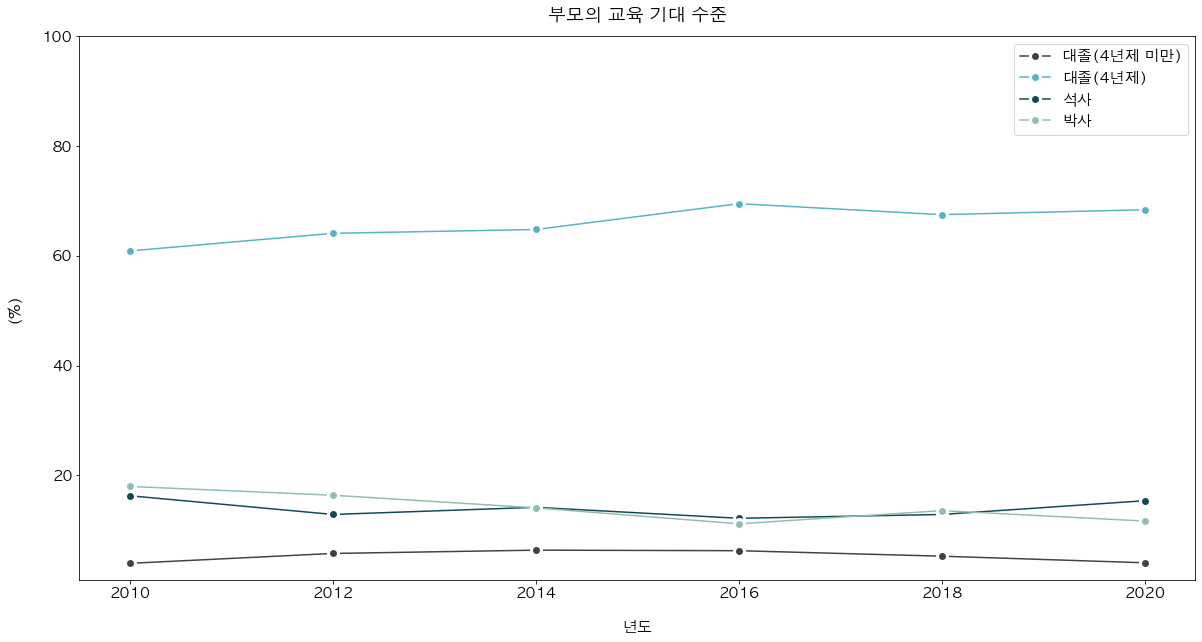

In [264]:
plt.figure(figsize=(20,10))
plt.plot(expect_grade.index, expect_grade['대졸(4년제 미만)'] ,label='대졸(4년제 미만)', marker='o', mec='w', mew=3, ms=10,c='#424242')
plt.plot(expect_grade.index, expect_grade['대졸(4년제)'] , label = '대졸(4년제)', marker='o', mec='w', mew=3, ms=10,c='#57b4c1')
plt.plot(expect_grade.index, expect_grade['석사'], label = '석사', marker='o', mec='w', mew=3, ms=10,c='#104a56')
plt.plot(expect_grade.index, expect_grade['박사'], label = '박사', marker='o', mec='w', mew=3, ms=10,c='#92beaf')


plt.legend()
plt.title('부모의 교육 기대 수준', pad = 15)
plt.ylim(1,100)
plt.ylabel('(%)', labelpad=20)
plt.xlabel('년도', labelpad=20)
plt.savefig('gidae1.png', dpi=300)


 이 그래프에서 주목해야할 점은 두가지가 있다. 대부분의 부모들(60% 이상)이 대학교 졸업(4년제)를 기대하고 있다는 것과 석사, 박사 수준의 교육수준을 원하는 부모의 비율이 생각보다 높다는 것이다. 위 그래프로 보면 4년제 대학교 졸업의 기대 결과가 상대적으로 많이 높아서 격차가 심해보이지만 석사 이상의 학력으로 범주를 좁혀보면 그래프는 아래와 같다. ( 대졸(4년제 미만)의 결과는 모든 해 10% 미만으로 밑에 그래프에서는 제외)

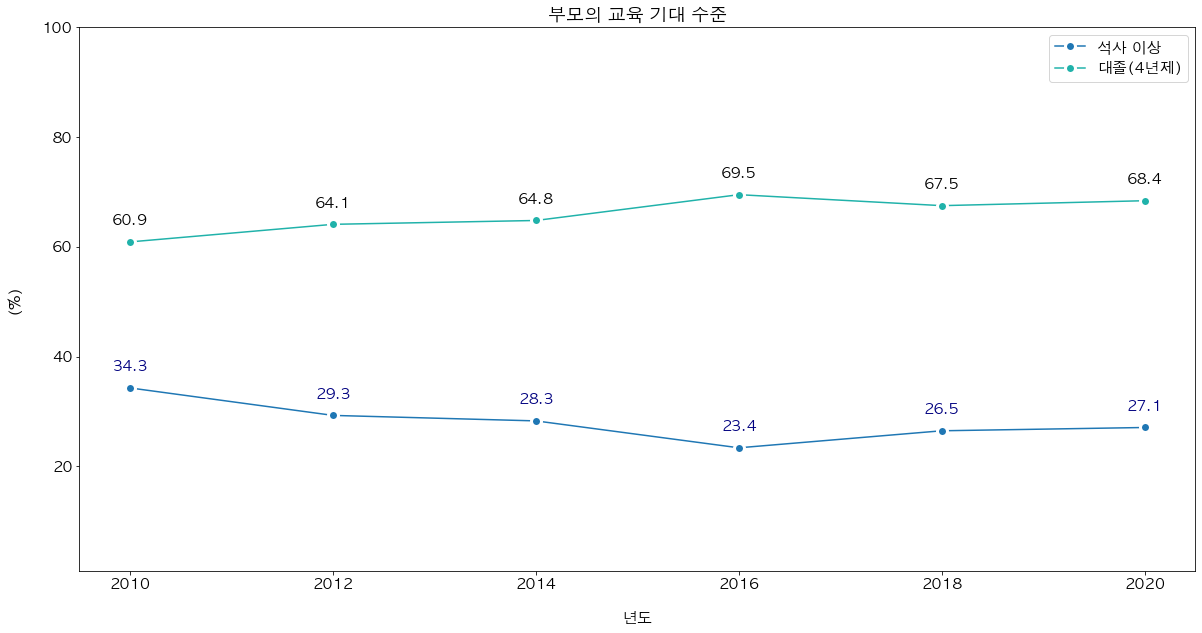

In [199]:
plt.figure(figsize=(20,10))
plt.plot(expect_grade.index, expect_grade['석사']+expect_grade['박사'] ,label='석사 이상', marker='o', mec='w', mew=3, ms=10)
plt.plot(expect_grade.index, expect_grade['대졸(4년제)'] , label = '대졸(4년제)', marker='o', mec='w', mew=3, ms=10, c='#20B2AA')

for idx, txt in enumerate(expect_grade['대졸(4년제)']):

    plt.text(expect_grade.index[idx], expect_grade['대졸(4년제)'].iloc[idx]+3, txt, ha='center', color = '#000000')

for idx, txt in enumerate(expect_grade['석사']+expect_grade['박사']):

    plt.text(expect_grade.index[idx], (expect_grade['석사']+expect_grade['박사']).iloc[idx]+3, round(txt,2), ha='center', color = '#000080') 
    
plt.legend()
plt.title('부모의 교육 기대 수준')
plt.ylim(1,100)
plt.ylabel('(%)', labelpad=20)
plt.xlabel('년도', labelpad=20)
plt.savefig('2group.png', dpi=300)
plt.show()

# for i in range(0, len(expect_grade)):
#     print(expect_grade.index[i], " : ", (expect_grade['대졸(4년제)'].iloc[i] + expect_grade['석사'].iloc[i] + expect_grade['박사'].iloc[i]), color='#000080' )
    
    

그래프의 흐름은 정확하게 두 그래프가 반대로 흐른다. 한쪽이 증가하면 한쪽이 감소하는 추세이다. 서울시 부모들의 기대 교육수준은 두 자료의 변동이 대부분이라고 봐도 무방 할 정도이다. 즉, 서울시 부모들의 교육 기대수준은 적어도 대학교 졸업(4년제)이다. (최소 93% 이상)  
  


그렇다면 여기서 생각해봐야할 점은 서울시 대부분의 부모들은 적어도 4년제 대학 이상의 학력을 자녀들에게 기대하고 있고 그에 대한 가장 큰 이유로는 '능력개'발과 '미래 직업'에 대한 목적이 있다.